# Desafio 1 - Grupo 2 

### INTEGRANTES:
### -Thomas Gomez
### -Pedro Torredo
### -Pedro Roisman
### -Segundo Rodriguez Parodi








### Objetivos del trabajo practico:

#### -Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
#### -Realizar un análisis descriptivo de las principales variables.
#### -Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

## 1) poner a tono el dataset

<p style="color:#FF0000";> Muy bien la idea de arrancar detallando los integrandes del grupo y los objetivos del trabajo. Capaz se puede mejorar un poco la estética, está muy cargado de negritas y letras grandes, no se diferencia bien los títulos del cuerpo.<p>

  ### 1.1)  Vamos a importar el dataset y ver un poco los datos

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re 

In [11]:
# ubicacion del dataset
data_location = 'properatti.csv'

data = pd.read_csv(data_location)

#vemos el dataset como esta compuesto

data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [12]:
#vemos que cantidad de filas y columnas tiene el dataset

print ( "cantidad de filas ", data.shape[0])
print ( "cantidad de columnas ", data.shape[1])

cantidad de filas  121220
cantidad de columnas  26


In [13]:
# vemos que tipo de datos es cada columna

data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

### 1.2) vamos a seleccionar las columnas que nos interesan y borrar las filas duplicadas

- #### primeros valores eliminados (eliminados: 5.251)

In [14]:
#<p style="color:#FF0000";>  No habría que incluir las columnas de texto libre al momento de identificar duplicados ya que es muy dificil que los propietarios redacten 2 veces el mismo texto.

In [15]:
#vamos a limpiar las columnas q no usamos para luego identificar los duplicados


data1 = data.loc[:,["property_type", "place_name", "place_with_parent_names", "state_name", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_aprox_usd", "surface_total_in_m2", "surface_covered_in_m2", "price_usd_per_m2", "price_per_m2", "rooms"]].drop_duplicates()

print("antes teniamos ", data.shape[0], "filas y ", data.shape[1], "columnas")

#ahora vamos a identificar los duplicados
data1_duplicados = data1.duplicated()
print("cantidad de datos duplicados ", data1_duplicados.sum())
             
#ahora con drop duplicate vamos a eliminar los que son True y estan duplicados


data2 = pd.concat([data1, data.loc[:,['description','title']]], axis=1, join = 'inner')

print("ahora tenemos ", data1.shape[0], "filas y ", data1.shape[1], "columnas")
print("ahora tenemos ", data2.shape[0], "filas y ", data2.shape[1], "columnas")


antes teniamos  121220 filas y  26 columnas
cantidad de datos duplicados  0
ahora tenemos  108024 filas y  14 columnas
ahora tenemos  108024 filas y  16 columnas


In [16]:
data2.head()

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,"-34.6477969,-58.5164244",95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


### 1.3) analizamos la cantidad de nulos que tiene el dataset

In [17]:
#ahora vamos a ver la cantidad de elementos nulos que tiene cada columna
data_nulos = data2.isnull()
cantidad_nulos = data_nulos.sum()
print("*cantidad de nulos*" , '\n')
print(cantidad_nulos, '\n')

#la idea es ver el % de nulos asi sabemos si las columnas sirven o no, o que trabajo tenemos que hacerle a cada una
cantidad_registros = data2.shape[0]
porcentaje_nulos = cantidad_nulos / cantidad_registros
print("*porcentaje de nulos*", '\n')
print(porcentaje_nulos)

*cantidad de nulos* 

property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       42657
price                         14556
currency                      14557
price_aprox_local_currency    14556
price_aprox_usd               14556
surface_total_in_m2           35225
surface_covered_in_m2         16660
price_usd_per_m2              44367
price_per_m2                  26453
rooms                         63899
description                       2
title                             0
dtype: int64 

*porcentaje de nulos* 

property_type                 0.000000
place_name                    0.000213
place_with_parent_names       0.000000
state_name                    0.000000
lat-lon                       0.394884
price                         0.134748
currency                      0.134757
price_aprox_local_currency    0.134748
price_aprox_usd               0.134748
surface_tota

In [18]:
data2_mask = data2 == 0
data2[data2_mask].sum()

property_type                 0.0
place_name                    0.0
place_with_parent_names       0.0
state_name                    0.0
lat-lon                       0.0
price                         0.0
currency                      0.0
price_aprox_local_currency    0.0
price_aprox_usd               0.0
surface_total_in_m2           0.0
surface_covered_in_m2         0.0
price_usd_per_m2              0.0
price_per_m2                  0.0
rooms                         0.0
description                   0.0
title                         0.0
dtype: float64

In [19]:
data3 = data2.replace([0, '0'], np.nan)

In [20]:
data_nulos_3 = data3.isnull()
cantidad_nulos_3 = data_nulos_3.sum()
print("*cantidad de nulos*" , '\n')
diferencia_nulos_3_2 = cantidad_nulos_3 - cantidad_nulos
print(diferencia_nulos_3_2, '\n')

*cantidad de nulos* 

property_type                   0
place_name                      0
place_with_parent_names         0
state_name                      0
lat-lon                         0
price                           1
currency                        0
price_aprox_local_currency      1
price_aprox_usd                 1
surface_total_in_m2           315
surface_covered_in_m2           2
price_usd_per_m2                0
price_per_m2                    0
rooms                           0
description                     0
title                           0
dtype: int64 



- #### Investigamos la columna price_aprox_usd

In [21]:
print('Tamaño columna price --->', data3['price_aprox_usd'].shape[0], '\n')
print('Valores nulos columna price --->', data3['price_aprox_usd'].isnull().sum(), '\n')
print('Valores NO nulos columna price --->', data3['price_aprox_usd'].notnull().sum(), '\n')
print(data3['price_aprox_usd'].describe())

Tamaño columna price ---> 108024 

Valores nulos columna price ---> 14557 

Valores NO nulos columna price ---> 93467 

count    9.346700e+04
mean     2.425848e+05
std      3.982600e+05
min      4.666620e+03
25%      9.000000e+04
50%      1.479000e+05
75%      2.700000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64


In [22]:
print('Tamaño columna surface total --->', data3['surface_total_in_m2'].shape[0], '\n')
print('Valores nulos columna surface total --->', data3['surface_total_in_m2'].isnull().sum(), '\n')
print('Valores NO nulos columna surface total --->', data3['surface_total_in_m2'].notnull().sum(), '\n')
print(data3['surface_total_in_m2'].describe())

Tamaño columna surface total ---> 108024 

Valores nulos columna surface total ---> 35540 

Valores NO nulos columna surface total ---> 72484 

count     72484.000000
mean        247.404420
std        1804.216703
min          10.000000
25%          52.000000
50%          90.000000
75%         217.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64


- #### Investigamos la columna property_type

In [23]:
data3['property_type'].value_counts()

apartment    60535
house        38120
PH            5453
store         3916
Name: property_type, dtype: int64

- #### de las 17.435 propiedades nulas, vamos a analizar que tipo de propiedad son para entender mejor 

In [24]:
# vamos a analizar cada tipo de propiedad

price_aprox_usd = data3['price_aprox_usd']
property_type_PH = data3['property_type'] == 'PH' 
PH_price = data3.loc[property_type_PH, 'price_aprox_usd']

property_type_apartment = data3['property_type'] == 'apartment' 
apartment_price = data3.loc[property_type_apartment, 'price_aprox_usd']

property_type_house = data3['property_type'] == 'house' 
house_price = data3.loc[property_type_house, 'price_aprox_usd']

property_type_store = data3['property_type'] == 'store' 
store_price = data3.loc[property_type_store, 'price_aprox_usd']

In [25]:
#ahora imprimos la cantidad de nulos para cada tipo de propiedad 

print('Cantidad de nulos en PH --->', PH_price.isnull().sum(), '\n')
print('Cantidad de nulos en apartment --->', apartment_price.isnull().sum(), '\n')
print('Cantidad de nulos en house --->', house_price.isnull().sum(), '\n')
print('Cantidad de nulos en store --->', store_price.isnull().sum(), '\n')

Cantidad de nulos en PH ---> 405 

Cantidad de nulos en apartment ---> 6607 

Cantidad de nulos en house ---> 6748 

Cantidad de nulos en store ---> 797 



In [26]:
#ahora vemos que % de nulos tiene cada tipo de propiedad 

print('Cantidad de nulos en PH --->', PH_price.isnull().sum() / PH_price.shape[0] , '\n')
print('Cantidad de nulos en apartment --->', apartment_price.isnull().sum() / apartment_price.shape[0] , '\n')
print('Cantidad de nulos en house --->', house_price.isnull().sum() / house_price.shape[0] , '\n')
print('Cantidad de nulos en store --->', store_price.isnull().sum() / store_price.shape[0] , '\n')

Cantidad de nulos en PH ---> 0.07427104346231432 

Cantidad de nulos en apartment ---> 0.10914347071941852 

Cantidad de nulos en house ---> 0.1770199370409234 

Cantidad de nulos en store ---> 0.20352400408580185 



- #### vamos a separar en bins para ver como se agrupan por precio todas las propiedades

In [27]:
#con qcut separamos en 4 bins de misma cantidad de datos, dejando afeura los nulos

priceusd_categorias = pd.qcut(data3['price_aprox_usd'], 4)
priceusd_categorias.value_counts()

(4666.619, 90000.0]       23757
(147900.0, 270000.0]      23751
(90000.0, 147900.0]       22981
(270000.0, 46545445.0]    22978
Name: price_aprox_usd, dtype: int64

In [28]:
# vemos los valores menores a 1000 usd y cuantos son

priceusd_menor_1000 = data3['price_aprox_usd'] < 1000
priceusd_menor_1000.value_counts()

False    108024
Name: price_aprox_usd, dtype: int64

In [29]:
data3.shape

(108024, 16)

In [30]:
data3.head()

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,"-34.6477969,-58.5164244",95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


## 2)  Vamos a trabajar ahora sobre las localidades

# ahora vamos a trabajar sobre las columnas de ubicacion

- ### Tenemos 3 columnas de ubicacion "place_name"   "place_with_parent_names"  "state_name"

- ### place_name no se puede utilizar como columna de Localidad ya que hay datos mal cargados, por ejemplo ciertas filas con nombres de Barrios Privados

- ### Es por eso que trabajamos la columna "place_with_parent_names", la splitiamos y obtuvimos la localidad de la misma. Esa localidad va a ser la ubicacion mas especifica para todo el trabajo 

In [31]:
#vamos a arrancar por sacar el pais Argentina ya que todas las propiedades son en Argentina.
# creamo una regex para sacar los |Argentina del comienzo de "place_with_parent_names"
import re
patron_argentina = "\|Argentina\|"
patron_regex_arg = re.compile(patron_argentina)
data3["place_with_parent_names"] = data3["place_with_parent_names"].apply(lambda x: x if x is np.NaN else patron_regex_arg.sub("",x))

#### una vez que tenemos la regex de thomas con todos los valores de m2, agregamos los datos a las dos columnas covered y total y ya podemos dividir la columna precio aprox usd por la columna final de surface que usemos para el total de la superficie. de esta manera obtenemos el verdadero valor de price per m2 REAL

In [32]:
data3.loc[:, ["place_with_parent_names"]].head(10)

,place_with_parent_names
0,Capital Federal|Mataderos|
1,Bs.As. G.B.A. Zona Sur|La Plata|
2,Capital Federal|Mataderos|
3,Capital Federal|Liniers|
4,Buenos Aires Costa Atlántica|Mar del Plata|Cen...
5,Entre Ríos|Gualeguaychú|
6,Bs.As. G.B.A. Zona Norte|Vicente López|Munro|
7,Capital Federal|Belgrano|
8,Capital Federal|Belgrano|
9,Santa Fe|Rosario|


In [33]:
#Splitiamos ahora "place_with_parent_names" en 3 columnas distintas (provincia, localidad, info extra) y las agregamos al DF

data3[["Provincia","Localidad", "Info_extra"]] = data3["place_with_parent_names"].str.split("|",n=2, expand=True)
data3.loc[:,["Provincia","Localidad", "Info_extra"]]

,Provincia,Localidad,Info_extra
0,Capital Federal,Mataderos,
1,Bs.As. G.B.A. Zona Sur,La Plata,
2,Capital Federal,Mataderos,
3,Capital Federal,Liniers,
4,Buenos Aires Costa Atlántica,Mar del Plata,Centro|
...,...,...,...
121214,Bs.As. G.B.A. Zona Norte,San Isidro,
121215,Capital Federal,Belgrano,
121216,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar|
121217,Capital Federal,Villa Urquiza,


In [34]:
data3.head(5)

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,Provincia,Localidad,Info_extra
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,Mataderos,
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,Bs.As. G.B.A. Zona Sur,La Plata,
2,apartment,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Capital Federal,Mataderos,
3,PH,Liniers,Capital Federal|Liniers|,Capital Federal,"-34.6477969,-58.5164244",95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,Capital Federal,Liniers,
4,apartment,Centro,Buenos Aires Costa Atlántica|Mar del Plata|Cen...,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,Buenos Aires Costa Atlántica,Mar del Plata,Centro|


In [35]:
#Creamos un nuevo DF con las 3 columnas del df original y con las columnas spliteadas para comparar la info de todas las columnas.

chequeo_data_frame = data3.loc[:,["state_name", "place_name", "place_with_parent_names", "Provincia", "Localidad", "Info_extra"]]
chequeo_data_frame.shape

(108024, 6)

In [36]:
#Creamos una mascara para aquellas propiedades sin Localidad(columna Localidad en blanco) para ver si podemos completar la localidad con la info de las otras columnas.

mask_propiedades_sin_localidad = data3["Localidad"] == ""

#Para corroborar, creamos un DF con aquellas propiedades sin localidad y comparamos las columnas. 
prop_sin_localidad = chequeo_data_frame.loc[mask_propiedades_sin_localidad,:]
prop_sin_localidad

,state_name,place_name,place_with_parent_names,Provincia,Localidad,Info_extra
108,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
110,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
115,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
119,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
121,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
...,...,...,...,...,...,...
121200,Córdoba,Córdoba,Córdoba|,Córdoba,,None
121202,Córdoba,Córdoba,Córdoba|,Córdoba,,None
121203,Córdoba,Córdoba,Córdoba|,Córdoba,,None
121205,Córdoba,Córdoba,Córdoba|,Córdoba,,None


In [37]:
#Con estas igualdades chequeamos que las columnas tienen la misma info y que no podemos obtener info adicional para completar la localidad de ciertas propiedas.

#son un total de 4402 propiedades sin localidad.

print((prop_sin_localidad["place_name"] == prop_sin_localidad["Provincia"]).all())
print((prop_sin_localidad["state_name"] == prop_sin_localidad["Provincia"]).all())

True
True


In [38]:
#chequeamos si hay propiedades que al haber spliteado "place_with_parent_names" hayan quedado con misma Provincia y Localidad.

print((data3["Provincia"] != data3["Localidad"]).all())

mask_misma_prov_y_localidad = data3["Provincia"] == data3["Localidad"]

print(mask_misma_prov_y_localidad.value_counts())

data3.loc[mask_misma_prov_y_localidad, ["state_name", "place_name", "place_with_parent_names", "Provincia", "Localidad", "Info_extra"]]


#hay 7421 otras propiedades que tienen misma Provincia y Localidad, es decir que no cuentan con Localidad. 
#Total de 12633 propiedades que no cuentan con Localidad especifica, unicamente provincia.

False
False    101395
True       6629
dtype: int64


,state_name,place_name,place_with_parent_names,Provincia,Localidad,Info_extra
10,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
32,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
87,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
88,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
89,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
...,...,...,...,...,...,...
120685,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120966,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120971,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120979,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,


- ### obtuvimos 4.402 propiedades con la columna "localidad" vacia, y 7.421 que tienen en la columna "localidad" la provincia

- #### vamos a borrar esas propiedades que no tienen localidad o la localidad es igual a la provincia

In [39]:
# chequeamos las columnas que quedaron
print(data3.isnull().sum())
print(data3.shape)

property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       42657
price                         14557
currency                      14557
price_aprox_local_currency    14557
price_aprox_usd               14557
surface_total_in_m2           35540
surface_covered_in_m2         16662
price_usd_per_m2              44367
price_per_m2                  26453
rooms                         63899
description                       2
title                             0
Provincia                         0
Localidad                         0
Info_extra                     3919
dtype: int64
(108024, 19)


- ### ahora chequeamos si hay vacios en la columna provincia

In [40]:
# vemos si hay nulos en la columna "provincia" creando una mascara

mask_provincia_vacio = data3["Provincia"] == ""

prop_sin_provincia = data3.loc[mask_provincia_vacio,:]
print(prop_sin_provincia.shape)

(0, 19)


### finamente cosneguimos que todas las propiedades tengan una localidad

### Analizamos aquellas localidades con pocas propiedades y las eliminamos del data set

In [41]:
#Analizamos cantidad de provincias y localidades
data3.loc[:,["Provincia","Localidad"]].describe()

,Provincia,Localidad
count,108024,108024
unique,28,539
top,Capital Federal,Tigre
freq,29051,7900


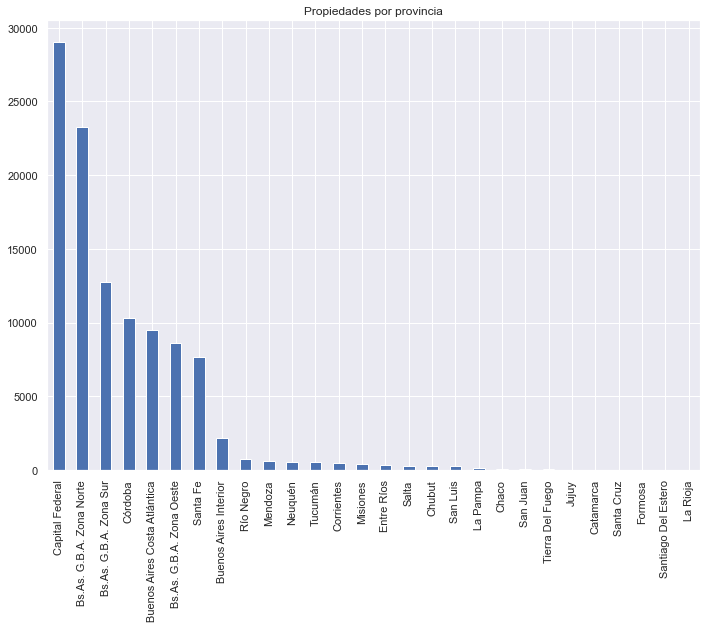

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = data3['Provincia'].value_counts().plot(kind='bar',
                                            title='Propiedades por provincia')

In [43]:
#En ciertas provincias contamos con muy pocas propiedades, con lo cual no nos sirven para el modelo.
data3["Provincia"].value_counts()

Capital Federal                 29051
Bs.As. G.B.A. Zona Norte        23300
Bs.As. G.B.A. Zona Sur          12775
Córdoba                         10287
Buenos Aires Costa Atlántica     9465
Bs.As. G.B.A. Zona Oeste         8588
Santa Fe                         7643
Buenos Aires Interior            2190
Río Negro                         735
Mendoza                           606
Neuquén                           548
Tucumán                           511
Corrientes                        492
Misiones                          399
Entre Ríos                        340
Salta                             263
Chubut                            249
San Luis                          235
La Pampa                          134
Chaco                              55
San Juan                           34
Tierra Del Fuego                   31
Jujuy                              26
Catamarca                          22
Santa Cruz                         20
Formosa                            17
Santiago Del

In [44]:
#cantidad de propiedades restantes
data3.shape

(108024, 19)

## 3)  La clave esta en la columna price per m2 en usd, por eso vamos a enfocarnos ahora en tener la mayor cantidad de datos posibles en esa columna

### 3.1) Arrancamos con la parte de Superficie
- #### vamos tratar de completar los valores que faltan entre las columnas surface total y surface covered

In [45]:
#analizamos superficie total por tipo de propiedad
data3.groupby("property_type")["surface_total_in_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3357.0,125.401251,308.520838,10.0,63.0,94.0,145.0,14742.0
apartment,43182.0,99.759923,1665.367242,10.0,43.0,60.0,89.0,200000.0
house,23395.0,509.605557,2061.603204,10.0,182.0,280.0,480.0,154438.0
store,2550.0,502.680392,2315.925895,10.0,60.0,154.0,370.0,93000.0


In [46]:
#analizamos superfice total por tipo de propiedad
data3.groupby("property_type")["surface_covered_in_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4637.0,89.045504,142.598761,1.0,52.0,75.0,105.0,6610.0
apartment,51763.0,76.248170,863.887943,1.0,40.0,53.0,77.0,187000.0
house,31966.0,217.838453,429.406820,1.0,120.0,180.0,260.0,38240.0
store,2996.0,421.355474,1587.540085,1.0,41.0,118.0,300.0,35000.0


In [47]:
# vemos cantidad de nulos en cada columna
print("nulos en superficie total:", data3["surface_total_in_m2"].isnull().sum())
print("nulos en superficie cubierta:", data3["surface_covered_in_m2"].isnull().sum())

nulos en superficie total: 35540
nulos en superficie cubierta: 16662


In [48]:
# vemos cuantos valores tenemos en 0 para la columna surface total 

ceros_total_surface = data3['surface_total_in_m2'] == 0
print(ceros_total_surface.value_counts())

False    108024
Name: surface_total_in_m2, dtype: int64


In [49]:
# vemos cuantos valores tenemos en 0 para la columna surface covered 

ceros_covered_surface = data3['surface_covered_in_m2'] == 0
print(ceros_covered_surface.value_counts())

False    108024
Name: surface_covered_in_m2, dtype: int64


In [50]:
print('valores nulos en superficie cubierta:', data3['surface_covered_in_m2'].isnull().sum())
print('valores nulos en superficie total:', data3['surface_total_in_m2'].isnull().sum())

valores nulos en superficie cubierta: 16662
valores nulos en superficie total: 35540


In [51]:
#vamos a ver una description de cada columna 

print(data3["surface_covered_in_m2"].describe(), '\n')

print(data3["surface_total_in_m2"].describe(), '\n')


count     91362.000000
mean        137.754679
std         760.355247
min           1.000000
25%          46.000000
50%          78.000000
75%         159.000000
max      187000.000000
Name: surface_covered_in_m2, dtype: float64 

count     72484.000000
mean        247.404420
std        1804.216703
min          10.000000
25%          52.000000
50%          90.000000
75%         217.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64 



- #### vamos a calcular los valores que tienen 0 en las dos columnas

- #### esto equivale a que % de ceros en cada columna?

<p style="color:#FF0000";> Ojo que están mal las cuentas acá, el denominador debería ser el total del data set, no ese recorte
    
    mask_total_ceros.sum()/data6.shape[0]
    mask_covered_ceros.sum()/data6.shape[0]


- #### por lo que vimos, la columna covered esta mucho mas completa que la de total surface. Pero tenemos datos que esten en covered pero no en total? 

In [52]:
print(data3['surface_total_in_m2'].isnull().sum())
print(data3['surface_covered_in_m2'].isnull().sum())

35540
16662


In [55]:
data3['total_en_zeros'] = data3['surface_total_in_m2'].fillna(0)
data3['covered_en_zeros'] = data3['surface_covered_in_m2'].fillna(0)

In [58]:
mask_covered_ceros = data3["covered_en_zeros"] == 0
mask_total_ceros = data3["total_en_zeros"] == 0

mask_ambas_columnas_cero = data3[data3.covered_en_zeros.isin(mask_covered_ceros) &~ data3.total_en_zeros.isin(mask_total_ceros)]

mask_ambas_columnas_cero.shape

print('la cantidad de ceros en ambas columnas es ',mask_ambas_columnas_cero.shape[0])

la cantidad de ceros en ambas columnas es  6045


In [59]:
# vamos a caluclar los valores con un 1 q tienen valor en total pero no tienen valot en covered

covered_vs_total = data3.apply(lambda x : 1 if x['total_en_zeros']!= 0 and x['covered_en_zeros'] == 0 else 0, axis=1)
covered_vs_total.value_counts()

0    102054
1      5970
dtype: int64

In [60]:
# vamos a caluclar los valores con un 1 q tienen valor covered pero no tienen valot en total

covered_vs_total_1 = data3.apply(lambda x : 1 if x['total_en_zeros']== 0 and x['covered_en_zeros'] != 0 else 0, axis=1)
covered_vs_total_1.value_counts()

0    83176
1    24848
dtype: int64

##### *lo que estamos diciendo aca es que, de un total de 0s de 32.555 en la columna total_surface, vamos a tener q imputar valores a 22.950 datos, osea que al final me tienen que quedar 9.605 datos con 0*

- #### ahora vamos a crear un ratio que me diga los m2 totales sobre m2 cubiertos para cada tipo de propiedad. Luego vamos a aplicar ese ratio a los valores que completemos 

In [66]:
#vemos los tipos de propiedad y la cantidad q tiene cada una

data3.property_type.value_counts(dropna = False)

apartment    60535
house        38120
PH            5453
store         3916
Name: property_type, dtype: int64

<p style="color:#FF0000";> Sacamos outliers antes de aplicar los ratios.<p>
 

In [85]:
#creamos nuevo dataset para hacer el cálculo de los ratios de tipo de propiedad
data_ratio = data3.replace([0, '0'], np.nan)
data_ratio.head(2)

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,rooms,description,title,Provincia,Localidad,Info_extra,total_en_zeros,covered_en_zeros,total_sin_outliers,covered_sin_outliers
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,...,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,Mataderos,,55.0,40.0,55.0,40.0
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,...,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,Bs.As. G.B.A. Zona Sur,La Plata,,NaN,NaN,NaN,NaN


In [117]:
#Creamos una funcion para eliminar outliers
def calculo_outliers_superficie(serie):
    q3 = serie.quantile(0.75)
    q1 = serie.quantile(0.25)
    iqr = q3 - q1 
    ls = q3 + iqr * 1.5
    li = q1 - iqr * 1.5
    outlier_mask = (serie < li) | (serie > ls)
    serie[outlier_mask] = np.NaN
    return serie

In [130]:
#aplicamos la función para surface total y surface covered
data3['total_sin_outliers'] = data_ratio.groupby('property_type')['surface_total_in_m2'].apply(lambda x : calculo_outliers_superficie(x))
data3['covered_sin_outliers'] = data_ratio.groupby('property_type')['surface_covered_in_m2'].apply(lambda x : calculo_outliers_superficie(x))
data3.head()

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,rooms,description,title,Provincia,Localidad,Info_extra,total_en_zeros,covered_en_zeros,total_sin_outliers,covered_sin_outliers
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,...,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,Mataderos,,55.0,40.0,55.0,40.0
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,...,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,Bs.As. G.B.A. Zona Sur,La Plata,,0.0,0.0,NaN,NaN
2,apartment,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,...,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Capital Federal,Mataderos,,55.0,55.0,55.0,55.0
3,PH,Liniers,Capital Federal|Liniers|,Capital Federal,"-34.6477969,-58.5164244",95000.0,USD,1676227.5,95000.0,NaN,...,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,Capital Federal,Liniers,,0.0,0.0,NaN,NaN
4,apartment,Centro,Buenos Aires Costa Atlántica|Mar del Plata|Cen...,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,...,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,Buenos Aires Costa Atlántica,Mar del Plata,Centro|,35.0,35.0,35.0,35.0


In [131]:
data3.loc[:,['total_sin_outliers', 'covered_sin_outliers']].describe()

,total_sin_outliers,covered_sin_outliers
count,66634.000000,85529.000000
mean,150.045532,108.012008
std,165.145320,91.584142
min,10.000000,1.000000
25%,50.000000,45.000000
50%,80.000000,72.000000
75%,182.000000,140.000000
max,927.000000,685.000000


<AxesSubplot:xlabel='total_sin_outliers', ylabel='Proportion'>

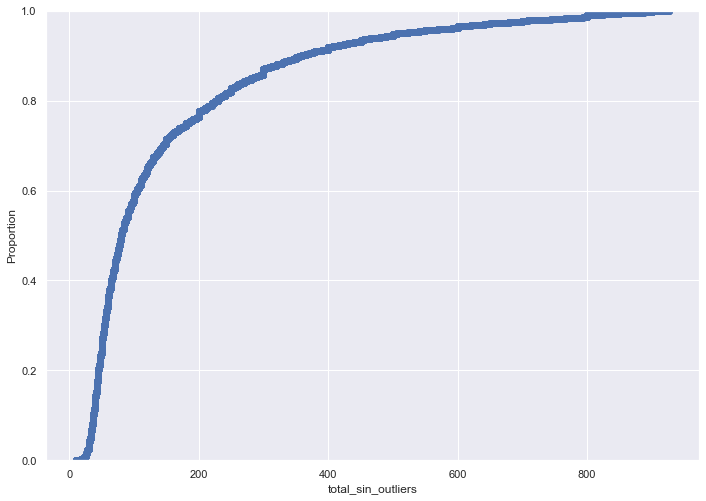

In [132]:
sns.ecdfplot(data3["total_sin_outliers"], marker="o", label = 'sin outliers')

(0.0, 2000.0)

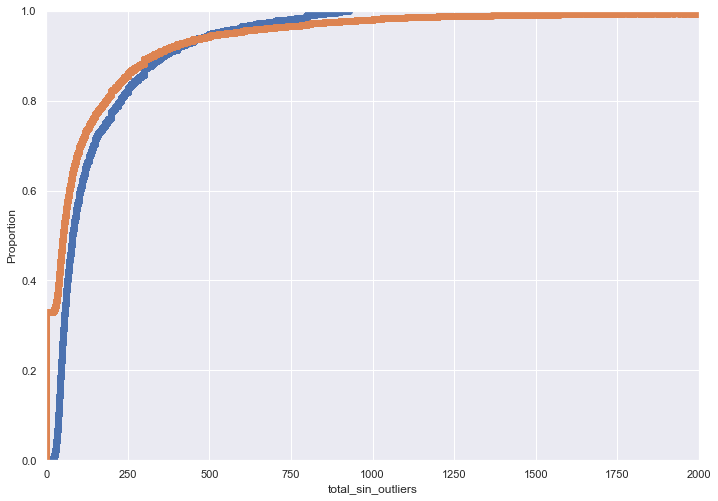

In [182]:
sns.ecdfplot(data3["total_sin_outliers"], marker="o", label = 'sin outliers')
sns.ecdfplot(data3['total_en_zeros'], marker='o', label = 'con outliers')
plt.ylim([0,1])
plt.xlim([0,2000])

In [134]:
#Creamos función para hacer el promedio de total vs covered según el tipo de propiedad

def average_in(prop):
    property_type = data3['property_type'] == prop
    average_type = data3[property_type]
    average = average_type.apply(lambda x : np.nan if x['total_sin_outliers'] == 0 or x['covered_sin_outliers'] == 0 else x['total_sin_outliers']/x['covered_sin_outliers'], axis = 1)
    return average.mean()

ap = 'apartment'
ho = 'house'
ph = 'PH'
st = 'store'

ratio_ap = average_in(ap)
ratio_ho = average_in(ho)
ratio_ph = average_in(ph)
ratio_st = average_in(st)

print('Ratio Apartment:', ratio_ap)
print('Ratio House:', ratio_ho)
print('Ratio PH:', ratio_ph)
print('Ratio Store:', ratio_st)

Ratio Apartment: 1.1891398847326422
Ratio House: 2.3743406155580207
Ratio PH: 1.3748349419956727
Ratio Store: 1.6725323847341214


<p style="color:#FF0000";>  Antes de calcular estos ratios deberían limpiarse los outliers, así no afectan las métricas

- #### ya tenemos los ratios para cada tipo de propiedad y ahora podemos completar los valores de surface total con esos ratios cuando solo tengamos el valor de surface covered

In [135]:
# imputamos los APARTMENT con surface_total en cero y con dato en covered 

total_ap = data3.apply(lambda x : (x['covered_en_zeros']*ratio_ap) if x['total_en_zeros']== 0 and x['covered_en_zeros'] != 0 and x['property_type'] == ap else 0, axis=1)
apartment_total = total_ap + data3['total_en_zeros']

apartment_total.value_counts()
apartment_total.max()


222369.15844500408

In [136]:
# imputamos los APARTMENT con surface_covered en cero y con dato en total 


covered_ap = data3.apply(lambda x : (x['total_en_zeros']/ratio_ap) if x['covered_en_zeros']==0 and x['total_en_zeros'] != 0 and x['property_type'] == ap else 0, axis=1)
apartment_covered = covered_ap + data3['covered_en_zeros']
apartment_covered.value_counts()
apartment_covered.max()

187000.0

In [137]:
## imputamos los HOUSES con surface_total en cero y con dato en covered 

total_ho = data3.apply(lambda x : (x['covered_en_zeros']*ratio_ho) if x['total_en_zeros']==0 and x['covered_en_zeros'] != 0 and x['property_type'] == ho else 0, axis=1)
house_total = total_ho + data3['total_en_zeros']
house_total.value_counts()
house_total.max()

200000.0

In [138]:
# imputamos los HOUSES con surface_covered en cero y con dato en tot 


covered_ho = data3.apply(lambda x : (x['total_en_zeros']/ratio_ho) if x['covered_en_zeros']==0 and x['total_en_zeros'] != 0 and x['property_type'] == ho else 0, axis=1)
house_covered = covered_ho + data3['covered_en_zeros']
house_covered.value_counts()
house_covered.max()

187000.0

In [139]:
# imputamos los PH con surface_total en cero y con dato en covered 


total_ph = data3.apply(lambda x : (x['covered_en_zeros']*ratio_ph) if x['total_en_zeros']==0 and x['covered_en_zeros'] != 0 and x['property_type'] == ph else 0, axis=1)
ph_total = total_ph + data3['total_en_zeros']
ph_total.value_counts()
ph_total.max()

200000.0

In [140]:
# imputamos los PH con surface_covered en cero y con dato en total 


covered_ph = data3.apply(lambda x : (x['total_en_zeros']/ratio_ph) if x['covered_en_zeros']==0 and x['total_en_zeros'] != 0 and x['property_type'] == ph else 0, axis=1)
ph_covered = covered_ph + data3['covered_en_zeros']
ph_covered.value_counts()
ph_covered.max()

187000.0

In [141]:
# imputamos los STORES con surface_total en cero y con dato en covered 


total_st = data3.apply(lambda x : (x['covered_en_zeros']*ratio_st) if x['total_en_zeros']==0 and x['covered_en_zeros'] != 0 and x['property_type'] == st else 0, axis=1)
store_total = total_st + data3['total_en_zeros']
store_total.value_counts()
store_total.max()

200000.0

In [142]:
# imputamos los STORES con surface_covered en cero y con dato en total 


covered_st = data3.apply(lambda x : (x['total_en_zeros']/ratio_st) if x['covered_en_zeros']==0 and x['total_en_zeros'] != 0 and x['property_type'] == st else 0, axis=1)
store_covered = covered_st + data3['covered_en_zeros']
store_covered.value_counts()
store_covered.max()

187000.0

In [144]:
#creamos las columnas en el dataframe 

data3['covered_imputados'] = covered_st + covered_ph + covered_ho + covered_ap + data3['covered_en_zeros']
data3['total_imputados'] = total_st + total_ph + total_ho + total_ap + data3['total_en_zeros']

In [149]:
#vemos los valores en 0 para la columna covered

covered_zeros_final_1 = data3['covered_imputados'] == 0
covered_zeros_final_1.value_counts()

False    97332
True     10692
Name: covered_imputados, dtype: int64

In [150]:
#vemos los valores en 0 para la columna total

total_zeros_final_1 = data3['total_imputados'] == 0
total_zeros_final_1.value_counts()

False    97332
True     10692
Name: total_imputados, dtype: int64

##### *finalmente llegamos al valor q estabamos esperando de 9.605 datos con valor 0 en cada columna*

In [151]:
data3.groupby(['property_type'])['total_imputados'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,5453.0,107.810762,247.838936,0.0,52.000000,88.000000,137.483494,14742.000000
apartment,60535.0,94.302066,1678.690915,0.0,40.000000,57.078714,86.000000,222369.158445
house,38120.0,443.101852,1688.624700,0.0,150.000000,279.000000,480.000000,154438.000000
store,3916.0,428.470976,2022.135967,0.0,33.450648,108.714605,315.000000,93000.000000


In [152]:
data3.groupby(['property_type'])['covered_imputados'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,5453.0,81.869801,198.180937,0.0,42.186882,69.000000,100.0,10722.741727
apartment,60535.0,72.599250,1065.589192,0.0,36.000000,50.000000,74.0,187000.000000
house,38120.0,190.849004,413.045218,0.0,90.000000,160.000000,243.0,38240.000000
store,3916.0,348.664997,1408.197084,0.0,25.000000,89.684362,250.0,35000.000000


In [161]:
data4 = data3.replace([0, '0'], np.nan)

nulos_3 = data3.isnull().sum()
nulos_4 = data4.isnull().sum()
print(nulos_4-nulos_3)

property_type                         0
place_name                            0
place_with_parent_names               0
state_name                            0
lat-lon                               0
price                                 0
currency                              0
price_aprox_local_currency            0
price_aprox_usd                       0
surface_total_in_m2                   0
surface_covered_in_m2                 0
price_usd_per_m2                      0
price_per_m2                          0
rooms                                 0
description                           0
title                                 0
Provincia                             0
Localidad                             0
Info_extra                            0
total_en_zeros                    35540
covered_en_zeros                  16662
total_sin_outliers                    0
covered_sin_outliers                  0
covered_imputados                 10692
total_imputados                   10692


## Analizamos Outliers que estan como NaN y valores en ceros de las columnas superficies cubiertas y total SIN Outliers

In [188]:
#con cuantos outliers contamos en cada columna?
print("outliers en superfice cubierta:", data4["covered_imputados_sin_outliers"].isnull().sum())
print("outliers en superfice total:", data4["total_imputados_sin_outliers"].isnull().sum())

outliers en superfice cubierta: 16921
outliers en superfice total: 17796


In [189]:
#Chequamos la cantidad de propiedades que tenemos en el data set
data4.shape

(108024, 27)

In [190]:
data4.isnull().sum()

property_type                         0
place_name                           23
place_with_parent_names               0
state_name                            0
lat-lon                           42657
price                             14557
currency                          14557
price_aprox_local_currency        14557
price_aprox_usd                   14557
surface_total_in_m2               35540
surface_covered_in_m2             16662
price_usd_per_m2                  44367
price_per_m2                      26453
rooms                             63899
description                           2
title                                 0
Provincia                             0
Localidad                             0
Info_extra                         3919
total_en_zeros                    35540
covered_en_zeros                  16662
total_sin_outliers                41390
covered_sin_outliers              22495
covered_imputados                 10692
total_imputados                   10692


## 3.2) Vamos a seguir completando datos de superficie pero vamos a ver si hay info en la columna "description"

In [191]:
import re

#### Lo que descubrimos es que los valores de price per m2 en usd es diferente que los de price per m2, porque uno toma la superficie total y el otro la superficie covered. Por eso debemos crear una sola columna de price per m2 en usd, unificando criterios. vamos a dividir la columna price aprox usd por los m2 totales. para eso tenemos q terminar de completar la columna surface total.  

In [192]:
# arrancamos creando una busqueda de la palabra metros y el valor que tiene previamente

patron_valor_metros = '(?P<valor_mts>\d{0,4} ?)(?P<metros>m2|mts|mt|mts2|mt2)'
patron_regex_metros = re.compile(patron_valor_metros, re.IGNORECASE)

valor_mts_match = data4["description"].apply(lambda x:x if x is np.NaN else patron_regex_metros.search(x).group("valor_mts") if patron_regex_metros.search(x)!=None else np.NaN)

data4['metros_description'] = valor_mts_match
data4['metros_description'].unique()

array([nan, '106 ', '40 ', ..., '1187 ', '803 ', '1346 '], dtype=object)

In [193]:
data4["metros_description"].value_counts()

         1896
50        960
100       692
40        572
80        564
         ... 
749         1
2625        1
926         1
407         1
1214        1
Name: metros_description, Length: 2092, dtype: int64

In [195]:
#ensanchamos la columna description para poder comparar los regex encontradas y la columna "description"
pd.set_option("display.max_colwidth",1000)

#Hay ciertos datos que el regex nos trae con espacio en blanco pero no pudimos econtrar el motivo.
mascara_espacios_blanco = data4["metros_description"] == ""
data4.loc[mascara_espacios_blanco,["metros_description","description"]].head()

,metros_description,description
214,,"Zona residencial consolidad; con oferta gastronómica, comercial, colegios, facultades, rápida salida a las autopistaCentro geográfico de CABAcocina integradacocina a gaspisos de porcelanatogriferia FVmuebles de cocina (alacena y bajo mesada)mesada de granitocortinas de enrollar en el dormitorio de aluminioplacard con puertas corredizas e interiores terminadoscalefacción por aire F/C instaladocerramientos de aluminiobalcónAgua caliente centralOrientacion Este, sol de mañanaespacio lavaderoAmenities:SUM ParrillaSolariumTransportes:Colectivos: 1, 2, 5, 8, 25, 26, 36, 44, 49, 53, 55, 76, 85, 86, 88, 96, 103, 104, 126, 132, 134, 136, 141, 163, 180Subtes (Metro): PUAN (Línea A)Trenes: CABALLITO (SARMIENTO)"
826,,"Venta de Casa 3 AMBIENTES en Boulogne, San Isidrocasa en planta baja 2 dormitorios baño completo living y cocina comedorlavadero quincho y parrilla patio con pileta plástica y solariumterraza - - DANIEL A. FIORITO PROPIEDADES"
983,,"Corredor Responsable: Marcelo Trujillo - CUCICBA 6470 / CMCPDJLM 810Contacto: Cristian Saladdino - MLS ID # 420261016-115Fecha de Entrega de todas las Unidades / Septiembre 2017 TOMAMOS a la Venta PROPIEDADES en parte de pago AQUAREL XIX - TERRERO 860- Terminaciones y Calidades Constructivas Pisos Porcellanato en ambientes baños y cocinas y Pisos con cerámicos Cerro Negro, San Lorenzo y/o similar en balcones Porcellanato en los Palieres y entrada del Edificio .- Cielorrasos : Aplicados de yeso Con bañas y armados en baños y sectores cocina Revoques : Yeso en interiores de los departamentos y palieres. En El resto de las partes comunes del Edificio fino a la ca. Terminaciones en el exterior del Edificio con salpicado plástico tipo Quimtex y/o similar .- Carpintería : Interiores Marcos de chapa doblado BMG 18 y hojas de Placa de madera mdf para pintar, herrajes tipo sanatorio pesado o similar Exteriores Marcos y Hojas de aluminio anodizado color natural tipo Modena o similar..."
984,,"Corredor Responsable: Marcelo Trujillo - CUCICBA 6470 / CMCPDJLM 810Contacto: Cristian Saladdino - MLS ID # 420261016-117Fecha de Entrega de todas las Unidades / SEPTIEMBRE2017 TOMAMOS a la Venta PROPIEDADES en parte de pago AQUAREL XIX - TERRERO 860- Terminaciones y Calidades Constructivas Pisos Porcellanato en ambientes baños y cocinas y Pisos con cerámicos Cerro Negro, San Lorenzo y/o similar en balcones Porcellanato en los Palieres y entrada del Edificio .- Cielorrasos : Aplicados de yeso Con bañas y armados en baños y sectores cocina Revoques : Yeso en interiores de los departamentos y palieres. En El resto de las partes comunes del Edificio fino a la ca. Terminaciones en el exterior del Edificio con salpicado plástico tipo Quimtex y/o similar .- Carpintería : Interiores Marcos de chapa doblado BMG 18 y hojas de Placa de madera mdf para pintar, herrajes tipo sanatorio pesado o similar Exteriores Marcos y Hojas de aluminio anodizado color natural tipo Modena o similar...."
1037,,"EXCELENTE DEPARTMENTE EN DUPLEX CON ETRADA POR 9 Y 10 PISO.-pb: LIVING COMEDOR.- COCINA AMPLIA-TOILETE DE RECEPCION con excelente vista al mar y la plaza.PA: 2 DORMTIORIOS- BAÑO COMPLETO- CON VISTA IGUAL A LA PLANTA BAJA.-TIENE DOBLE ENTRADA , POR 9 PISO Y 10 PISO.-DIGNO DE VER.- SEGURIDAD LAS 24 HORAS.-"


In [196]:
#En muchos casos el patron es correcto, y en otros casos agarra los metros cuadrados de otro objeto que no es el terreno. Por una cuestion de tiempos lo dejamos asi.

metros_description_not_null = data4['metros_description'].notnull()
data4.loc[metros_description_not_null,["metros_description","description"]].head(10)

,metros_description,description
6,106,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENTE - SIN EXPENSAS! TODO EN PLANTA BAJA DOS DORMITORIOS (pisos de pinotea) - LIVING - COCINA COMEDOR - BAÑO - PATIO - GALPÓN Y LAVADERO EN EL PATIOEN MUY BUEN ESTADO - INMEJORABLE UBICACIÓN - A 1 CUADRA DE LA ESTACIÓN DE MUNRO - CERCA DE MAS DE 6 LINEAS DE COLECTIVOS - A 2 CUADRAS DEL CENTRO UNIVERSITARIO. 106 m2 TOTALES: 78 m2 CUBIERTOS Y 28 m2 DESCUBIERTOSAPTO PROFESIONAL Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
18,40,"Casa sobre lote al golf en barrio San Isidro Labrador.Planta Baja:Amplio Living comedor en doble altura,Toilette,Cocina comedor, Family/Escritorio, Lavadero, dependencia de servicio, Galería cubierta y semi cubierta.Planta Alta:Master Suite con ducha escocesa e hidromasajes doble, tres dormitorios, Baño, Escritorio y Placar de Blanco.Todos los pisos son de porcelanato.Losa Radiante en todos los ambientes y galería.Piscina con espejo de agua de 40 m2."
22,1000,"Edificada en 2 plantas. PB. amplio living con salida al parque, cocina con salida a la galería, todos los ambientes de pb con pisos de porcelanato. Toilet de recepción, lavadero, galería con parrilla. Amplio jardín de 1000 m2.PA: 3 dormitorios con pisos de porcelanato, uno de los cuales es en suite con vestidor, 2 baños completos. Hermosa vista abierta desde toda la planta alta. Muy luminosa! hermoso hogar a leña en el living. Cálida y acogedora.calefaccion por radeadores.la casa se encuentra en construcción, entrega terminada y pintada. No incluye mobiliario de cocinaEl barrio cuenta con una completa infraestructura de servicios y propuestas deportivas y la posibilidad de vivir en un entorno seguro y rodeado de espacios verdes.Las 365 hectáreas que lo conforman están desarrolladas en 906 lotes de 1350m2 en promedio, lo que ofrece un privilegiado entorno natural y un particular microclima que se logró destinando para lotes solo el 30% de la superficie del lugar.Actividades D..."
24,160,"EXCLUSIVO DEPARTAMENTO DE EXCELENTE CATEGORIA EN VENTA EN CASTELAR160 MTS2 Cubiertos. 4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO PUBLICADO CORRESPONDE AL VALOR DE CONTADO para las unidades de primer y segundo piso. FINANCIACION: ANTICIPO USD71.000, USD 105.000 A LA ESCRITURA Y EL RESTO FINANCIADO EN 36 CUOTAS (con refuerzos semestrales) VALOR FINANCIADO USD 380.940Piso con Palier privado con puerta de seguridad y entrada de servicio. Linving comedor , 3 dormitorios uno de los cuales es en suite con ducha escocesa, con vestidor. Otros 2 dormitorios con placars que comparten un baño completo con bañera. pisos de madera en dormitorios y living comedor, pisos de porcelanato en pasillos y cocina. ventanas de aluminio con DVH (doble vidrio hermético) en todo el depto. Cocina completa (con cocina vitroceramica, horno eléctrico, microondas, heladera con frezzer, cafetera express todos marca BGH), despensa y lavadero. Toilete, balcón terraza co..."
25,160,"EXCLUSIVO DEPARTAMENTO DE EXCELENTE CATEGORÍA EN VENTA EN CASTELAR160 MTS2 Cubiertos. 4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO PUBLICADO CORRESPONDE AL VALOR DE CONTADO para las unidades de tercer y cuarto piso. FINANCIACIÓN: ANTICIPO USD 71.800, USD106.000 A LA ESCRITURA Y EL RESTO FINANCIADO EN 36 CUOTAS (con refuerzos semestrales) VALOR FINANCIADO USD 385.640Piso con Palier privado con puerta de seguridad y entrada de servicio. Linving comedor , 3 dormitorios uno de los cuales es en suite con ducha escocesa, con vestidor. Otros 2 dormitorios con placars que comparten un baño completo con bañera. pisos de madera en dormitorios y living comedor, pisos de porcelanato en pasillos y cocina. ventanas de aluminio con DVH (doble vidrio hermético) en todo el depto. Cocina completa (con cocina vitroceramica, horno eléctrico, microondas, heladera con frezzer, cafetera express todos marca BGH), despensa y lavadero. Toilete, balcón terraz

In [197]:
#ensanchamos la columna description para poder comparar los regex encontradas y la columna "description"
pd.set_option("display.max_colwidth",300)

In [198]:
data4.isnull().sum()

property_type                         0
place_name                           23
place_with_parent_names               0
state_name                            0
lat-lon                           42657
price                             14557
currency                          14557
price_aprox_local_currency        14557
price_aprox_usd                   14557
surface_total_in_m2               35540
surface_covered_in_m2             16662
price_usd_per_m2                  44367
price_per_m2                      26453
rooms                             63899
description                           2
title                                 0
Provincia                             0
Localidad                             0
Info_extra                         3919
total_en_zeros                    35540
covered_en_zeros                  16662
total_sin_outliers                41390
covered_sin_outliers              22495
covered_imputados                 10692
total_imputados                   10692


In [304]:
#Reemplazamos los ceros por nulos en "total_imputados" y vemos la cantidad de nulos que tenemos. esto lo hacemos para poder trabajar mejor esta columna

data4["total_imputados"].isnull().sum()

10692

- ### Aquellos valores nulos de "total imputados" vamos a reemplazarlos con aquellos datos obtenidos en la columna "metros_description"¶

In [303]:
# creamos una mascala de nulos en total imputados 

mask_nulos_total_imputados = data4["total_imputados"].isnull()
data4.loc[mask_nulos_total_imputados,["total_imputados","metros_description"]].sample(10)

,total_imputados,metros_description
23021,NaN,454
11324,NaN,NaN
92423,NaN,NaN
110808,NaN,6
44174,NaN,NaN
96398,NaN,NaN
15038,NaN,NaN
95544,NaN,NaN
50272,NaN,NaN
14594,NaN,257


In [305]:
# completamos los datos nulos de total por el valor en metros description

data4["total_imputados"].fillna(data4["metros_description"], inplace=True)

#Comprobamos como se redujo la cantidad de nulos en total_imputados
print(data4["total_imputados"].isnull().sum())


7691


- #### como podemos ver, pasamos de 9.605 propiedades sin superficie, a 6.823

- ### 3.3) Ahora vamos a eliminar las propiedades que quedaron nulas sin superficie

In [306]:
data4.isnull().sum()

property_type                          0
place_name                            23
place_with_parent_names                0
state_name                             0
lat-lon                            42657
price                              14557
currency                           14557
price_aprox_local_currency         14557
price_aprox_usd                    14557
surface_total_in_m2                35540
surface_covered_in_m2              16662
price_usd_per_m2                   44367
price_per_m2                       26453
dormitorios_letras                 86543
dormitorios_numeros                70420
numero_ambientes_title_letras     103097
rooms                              11710
description                            0
title                                  0
Provincia                              0
Localidad                              0
Info_extra                          3919
total_en_zeros                     35540
covered_en_zeros                   16662
total_sin_outlie

- ### 3.4) Vamos a borrar las columnas que no usamos mas 

In [206]:
data4.shape

(108024, 28)

- ### 3.5) Vamos a crear finalmente la columna de precio en usd por m2

In [307]:
# para eso, tenemos que asegurarnos que la columna total_imputados sean todos datos float

data4['total_imputados'] = data4['total_imputados'].replace(' ', np.nan)

print(data4['total_imputados'].isnull().sum())

data4.dtypes

7783


property_type                      object
place_name                         object
place_with_parent_names            object
state_name                         object
lat-lon                            object
price                             float64
currency                           object
price_aprox_local_currency        float64
price_aprox_usd                   float64
surface_total_in_m2               float64
surface_covered_in_m2             float64
price_usd_per_m2                  float64
price_per_m2                      float64
dormitorios_letras                float64
dormitorios_numeros               float64
numero_ambientes_title_letras     float64
rooms                             float64
description                        object
title                              object
Provincia                          object
Localidad                          object
Info_extra                         object
total_en_zeros                    float64
covered_en_zeros                  

In [308]:
# creamos una serie para convertirlo en floats

import pandas as pd

serie_numeros_total_imputados = pd.to_numeric(data4['total_imputados'])

In [310]:
data4['total_imputados'] = serie_numeros_total_imputados

data4['total_imputados'].shape
data4.dtypes

property_type                      object
place_name                         object
place_with_parent_names            object
state_name                         object
lat-lon                            object
price                             float64
currency                           object
price_aprox_local_currency        float64
price_aprox_usd                   float64
surface_total_in_m2               float64
surface_covered_in_m2             float64
price_usd_per_m2                  float64
price_per_m2                      float64
dormitorios_letras                float64
dormitorios_numeros               float64
numero_ambientes_title_letras     float64
rooms                             float64
description                        object
title                              object
Provincia                          object
Localidad                          object
Info_extra                         object
total_en_zeros                    float64
covered_en_zeros                  

In [120]:
pd.options.mode.chained_assignment = None  # SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.

In [215]:
data4.groupby("property_type")["price_usd_per_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3132.0,1449.210511,1053.106126,13.566680,978.035275,1316.666667,1786.007026,30000.000000
apartment,38893.0,2657.593013,3099.210567,0.600000,1693.548387,2181.081081,2800.000000,206333.333333
house,19612.0,1171.621481,1359.795714,2.072029,526.182951,1046.511628,1518.324607,80000.000000
store,2020.0,2171.793586,2333.980389,9.875610,974.493243,1625.000000,2688.701923,57382.080000


In [216]:
#Redondeamos para reducir la cantidad de np.inf , pareceria que se hace automaticamente por un tema de memoria
data4["price_aprox_usd"] = data4["price_aprox_usd"].round(2)
data4["total_imputados"] = data4["total_imputados"].round(2)

In [324]:
data4.head()

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,covered_imputados_sin_outliers,metros_description,final_price_usd_m2,refaccionado,pileta,amenities,cochera,financiacion,rooms_sin_outliers,price_usd_per_m2_sin_outliers
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,...,40.0,NaN,1550.00,1,0,0,0,0,2.0,1127.272727
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,...,NaN,NaN,NaN,0,0,0,1,0,1.0,NaN
2,apartment,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,...,55.0,NaN,1309.09,0,0,0,0,0,2.0,1309.090909
3,PH,Liniers,Capital Federal|Liniers|,Capital Federal,"-34.6477969,-58.5164244",95000.0,USD,1676227.5,95000.0,NaN,...,NaN,NaN,NaN,0,0,0,0,0,3.0,NaN
4,apartment,Centro,Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,...,35.0,NaN,1828.57,0,0,0,0,0,2.0,1828.571429


In [331]:
data4['price_usd_per_m2_sin_outliers'] = data4.groupby('property_type')['price_usd_per_m2'].apply(lambda x : calculo_outliers_superficie(x))
data6 = data4.replace([0,'0'],np.nan)

In [332]:
# creamos la columna de precio por m2 en usd dividiendo la columna de precio en usd por la que ya tenemos completa de total imputados

data6["final_price_usd_m2"] = (data6["price_usd_per_m2_sin_outliers"] / data6["total_imputados"]).round(2)


In [326]:
#Contamos con 1271 que el precio por metro 2 es np.inf
data4[mask_inf]

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,covered_imputados_sin_outliers,metros_description,final_price_usd_m2,refaccionado,pileta,amenities,cochera,financiacion,rooms_sin_outliers,price_usd_per_m2_sin_outliers


In [333]:
data6["final_price_usd_m2"].isnull().sum()

47152

In [334]:
data6.groupby("property_type")["final_price_usd_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3082.0,18.353965,15.851482,0.0,7.1225,13.67,25.000,175.78
apartment,36699.0,39.434033,23.542961,0.0,22.6800,35.15,51.455,243.06
house,19191.0,5.526634,6.957115,0.0,1.2000,3.97,7.295,263.59
store,1900.0,27.302853,41.742972,0.0,2.7200,10.44,33.670,326.39


In [335]:
data6.isnull().sum()

property_type                          0
place_name                            23
place_with_parent_names                0
state_name                             0
lat-lon                            42657
price                              14557
currency                           14557
price_aprox_local_currency         14557
price_aprox_usd                    14557
surface_total_in_m2                35540
surface_covered_in_m2              16662
price_usd_per_m2                   44367
price_per_m2                       26453
dormitorios_letras                 86543
dormitorios_numeros                70438
numero_ambientes_title_letras     103097
rooms                              11710
description                            0
title                                  0
Provincia                              0
Localidad                              0
Info_extra                          3919
total_en_zeros                     35540
covered_en_zeros                   16662
total_sin_outlie

In [336]:
data6.shape

(108024, 39)

- ### finalmente creamos la columna "final_price_usd_m2" que es la columna con todos los valores por m2 pero con los 12.174 nulos que son los que no tienen precio

In [316]:
#Creamos una nueva columna de superficie total SIN outliers
data5 = data4.replace([0,'0'], np.nan)
data5["total_imputados_sin_outliers"] = data5.groupby('property_type')['total_imputados'].apply(lambda x : calculo_outliers_superficie(x))
data5["covered_imputados_sin_outliers"] = data5.groupby('property_type')['covered_imputados'].apply(lambda x : calculo_outliers_superficie(x))

In [317]:
data5.groupby('property_type')['total_imputados_sin_outliers'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4730.0,102.863302,55.284225,1.37,60.49,90.87,136.0,265.34
apartment,52110.0,65.493856,29.508950,1.00,44.00,58.00,81.0,157.00
house,32771.0,346.522120,227.409963,2.00,185.00,290.00,461.0,1020.00
store,3247.0,182.175528,180.870023,1.67,43.00,111.00,260.0,800.00


<AxesSubplot:xlabel='covered_imputados_sin_outliers', ylabel='Proportion'>

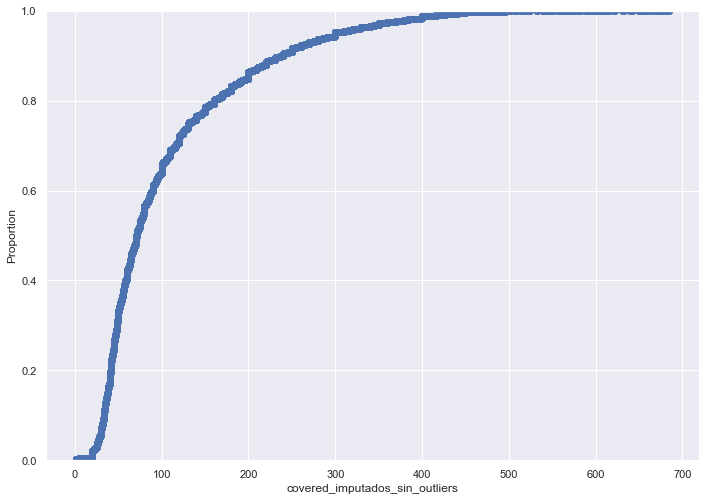

In [319]:
sns.ecdfplot(data5["covered_imputados_sin_outliers"], marker="o", label = 'sin outliers')


(0.0, 1500.0)

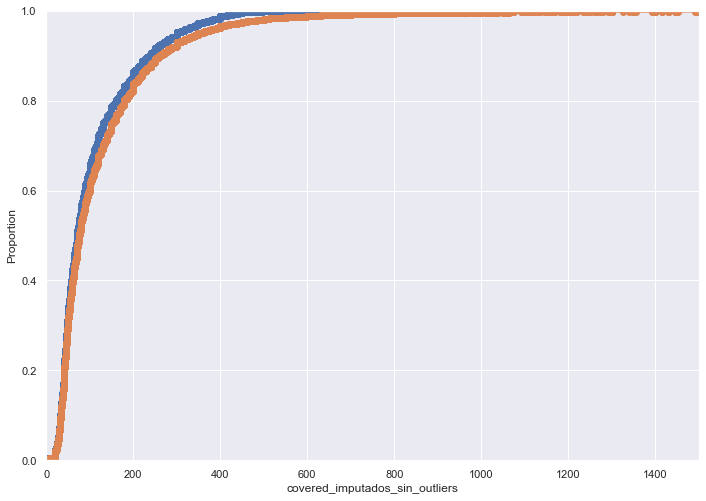

In [322]:
sns.ecdfplot(data5["covered_imputados_sin_outliers"], marker="o", label = 'sin outliers')
sns.ecdfplot(data5['covered_imputados'], marker='o', label = 'con outliers')
plt.xlim([0,1500])

# 4) Trabajamos sobre rejex para descubrir otras conexiones al precio

In [235]:
#vamos a separar la columna "description" para analizarla sola

data_description = data5["description"]

data_description.head(5)

0    2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...
1    Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño com...
2                                                          2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
3                                                                                    

In [236]:
#vamos a ver los que son nulos

data_description_null = data_description.isnull()
print("hay ",data_description_null.sum(), "valores nulos")

#identificamos las dos filas q tienen valores nulos en "description"
data_description_null = data4[data4.description.isnull()]
data_description_null

hay  2 valores nulos


,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,total_en_zeros,covered_en_zeros,total_sin_outliers,covered_sin_outliers,covered_imputados,total_imputados,total_imputados_sin_outliers,covered_imputados_sin_outliers,metros_description,final_price_usd_m2
10664,apartment,Villa Carlos Paz,Córdoba|Villa Carlos Paz|,Córdoba,"-31.4207828,-64.4992141",2350000.0,ARS,2325485.81,131796.64,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96691,apartment,San Fernando,Bs.As. G.B.A. Zona Norte|San Fernando|,Bs.As. G.B.A. Zona Norte,NaN,98000.0,USD,1729161.00,98000.00,NaN,...,NaN,55.0,NaN,55.0,55.0,65.4,65.402694,55.0,NaN,1781.82


- ### 4.1) buscamos las propiedades que fueron refaccionadas 

In [237]:
pd.options.mode.chained_assignment = None  # default='warn'

In [337]:
#vamos a buscar la palabra "refaccionado" ya que podria afectar el precio al ser un departamento mejorado. estos datos los ingresamos en la columna nueva de "refaccionados"

import re

data5["refaccionado"] = data5["description"].str.contains(r'(?i)refac')

print(data5[["description","refaccionado"]].head(3))


                                                                                                                                                                                                                                                                                                   description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...   
1  Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño com...   
2                                                        2 AMBIENTES 3ER PISO LATE

<p style="color:#FF0000";> Fijense que en la regex, el termino 'refac' contempla a 'refaccionado', por lo que no es necesario agregar al segundo

In [338]:
#ahora tenemos todos los refaccionados como True en la columna "refaccionados", vamos a ver cuantos departamentos refaccionados hay
#para eso definimos como 0 a las propiedades q no son 'refaccionadas' y como 1 las que si

data_refaccionado_column =  data5.apply(lambda x: 0 if x.refaccionado == False else 1, axis=1)

print(data_refaccionado_column.value_counts())

data5["refaccionado"] = data_refaccionado_column


0    106192
1      1832
dtype: int64


#### podemos decir q tenemos 1.671 propiedades que estan refaccionadas

- ### 4.2) buscamos las propiedades que tienen pileta

<p style="color:#FF0000";> 'piscina' puede ser una palabra con alta probabilidad de ser mal escrita. En este tipo de trabajos, donde las cargas de texto libres son totalmente informales, es buena idea incluir regex que contemplen typos o erroes de ortigrafia: piscina|pisina|picina

In [339]:
#ahora vamos a buscar los q tienen pileta

data5["pileta"] = data5["description"].str.contains(r'(?i)pileta|piscina|picina|pisina')
print(data4[["description","pileta"]])

                                                                                                                                                                                                                                                                                                        description  \
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...   
1       Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño com...   
2                                                             2 AMB

In [340]:
#hacemos lo mismo de ver cuantas propeidades tienen pileta y ponemos 0 las que no tiene (osea q son false) y 1 las q si

data_pileta_column =  data5.apply(lambda x: 0 if x.pileta == False else 1, axis=1)

print(data_pileta_column.value_counts())

#ponemos la data de pileta en la columna pileta del data frame
data5["pileta"] = data_pileta_column

#ahi quedo la columna pileta con 0s y 1s 
data5["pileta"] 


0    78804
1    29220
dtype: int64


0         0
1         0
2         0
3         0
4         0
         ..
121214    0
121215    1
121216    1
121217    0
121219    0
Name: pileta, Length: 108024, dtype: int64

#### podemos decir q tenemos 27.576 propiedades con pileta

- ### 4.3) buscamos las propiedades que tienen amenities

In [341]:
#ahora vamos a buscar los q tienen amenities

data5["amenities"] = data5["description"].str.contains(r'(?i)amenities|amennities|amenitis')
print(data5[["description","amenities"]])

                                                                                                                                                                                                                                                                                                        description  \
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...   
1       Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño com...   
2                                                             2 AMB

In [342]:
#hacemos lo mismo de ver cuantas propeidades tienen amenities y ponemos 0 las que no tiene (osea q son false) y 1 las q si

data_amenities_column =  data5.apply(lambda x: 0 if x.amenities == False else 1, axis=1)

print(data_amenities_column.value_counts())


0    98749
1     9275
dtype: int64


In [343]:
#ponemos la data de amenities en la columna amenities del data frame
data5["amenities"] = data_amenities_column

#ahi quedo la columna amenities con 0s y 1s 
data5["amenities"]


0         0
1         0
2         0
3         0
4         0
         ..
121214    0
121215    0
121216    0
121217    1
121219    0
Name: amenities, Length: 108024, dtype: int64

#### podemos decir q tenemos 8.866 propiedades con amenities

- ### 4.4) buscamos las propiedades que tienen cochera

<p style="color:#FF0000";> Hay que intentar hacer regex más amplias, que abarquen un mismo concepto mediante distintas palabras. En cochera podríamos agregar 'garage' por ejemplo

In [344]:
#ahora vamos a buscar los q tienen cochera

data5["cochera"] = data5["description"].str.contains(r'(?i)cochera|estacionamiento|parking|parkin')
print(data5[["description","cochera"]])

                                                                                                                                                                                                                                                                                                        description  \
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...   
1       Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño com...   
2                                                             2 AMB

In [345]:
#hacemos lo mismo de ver cuantas propeidades tienen cochera y ponemos 0 las que no tiene (osea q son false) y 1 las q si

data_cochera_column =  data5.apply(lambda x: 0 if x.cochera == False else 1, axis=1)

print(data_cochera_column.value_counts())

data5["cochera"] = data_cochera_column

0    69434
1    38590
dtype: int64


#### podemos decir q tenemos 35.066 propiedades con cochera

- ### 4.5) buscamos las propiedades que se venden con financiacion y que muchas veces afectan el precio

In [347]:
#ahora vamos a buscar los q dicen cuotas o financiacion porque muchas veces me contaminan el precio, poniendo el valot de una cuota y que luego me afecta el precio por m2

data5["financiacion"] = data5["description"].str.contains(r'(?i)financi|cuota')
print(data5[["description","financiacion"]])

                                                                                                                                                                                                                                                                                                        description  \
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...   
1       Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño com...   
2                                                             2 AMB

In [348]:
#hacemos lo mismo de ver cuantas propeidades tienen financiacion y ponemos 0 las que no tiene (osea q son false) y 1 las q si

data_financiacion_column =  data5.apply(lambda x: 0 if x.financiacion == False else 1, axis=1)

print(data_financiacion_column.value_counts())

data5["financiacion"] = data_financiacion_column

0    97501
1    10523
dtype: int64


#### podemos decir q tenemos 8.527 propiedades con cuotas o financiacion. estas propiedades deberiamos analizarla con la variable precio o precio por m2 a ver si encontramos una relacion de tener precio mas bajo q el promedio

In [349]:
data5.head(3)

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,total_imputados_sin_outliers,covered_imputados_sin_outliers,metros_description,final_price_usd_m2,refaccionado,pileta,amenities,cochera,financiacion,rooms_sin_outliers
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,...,55.0,40.0,NaN,1550.00,1,0,0,0,0,2.0
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,...,NaN,NaN,NaN,NaN,0,0,0,1,0,1.0
2,apartment,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,...,55.0,55.0,NaN,1309.09,0,0,0,0,0,2.0


## 5) Ahora vamos a tratar de reconstruir la columna rooms con la data de description

In [350]:
#Buscamos aquellas propiedades sin Rooms
mask_no_rooms = data5["rooms"].isnull()
data5.loc[mask_no_rooms,["rooms","description","title"]]

,rooms,description,title
6,NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENTE - SIN EXPENSAS! TODO EN PLANTA BAJA DOS DORMITORIOS (pisos de pinotea) - LIVING - COCINA COMEDOR - BAÑO - PATIO - GALPÓN Y LAVADERO EN EL PATIOEN MUY BUEN ESTADO - INMEJORABLE UBICACIÓN - A 1 CUADRA DE LA ESTACIÓN DE MUNRO - CERCA DE MAS DE 6 LIN...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO, EXCELENTE UBICACION EN MUNRO"
27,NaN,Estancias propone vivir rodeados de naturaleza y verde. Por este motivo se destinó el 50% del emprendimiento a espacios comunes con una parquización diseñada por el Estudio Thays. Además de reservar algunos espacios en su estado natural para garantizar una mejor calidad de vida. La ribera del Rí...,Excelente Propiedad!!!! en Estancias del Pilar
47,NaN,ESTRUCTURA ECOLOGICA FLOTANTEIDEAL PARA UBICAR EN CENTRO NAUTICOMATERIALES EPS NORMAS DE CALIDAD DIN 4102 Y R1 según ABNT MB 1562 y ensayado por el INTI según IRAM 11918. TRASLADABLES POR AGUATRANSPORTABLES POR TIERRABIODIGESTOR PARA TRATAMIENTO DE AGUASPROTECCIÓN GALVANIZADA EN TODA LA ESTRUCT...,FLOAT LIFE - CASA FLOTANTE - UBICABLE EN CLUBS NAUTICOS
49,NaN,"JPL. Casa en el barrio San Sebastian con bajada al lago, la casa se encuentra en construccion, ya se encuentra totalmente pintada ya sea por fuera o por dentro. Esta ubicada en el area 5 de san sebastioan en un lote de 1000 m2",JPL. Casa en San Sebastian
57,NaN,"VENTA DE LOCAL SOBRE VÍA PÚBLICA CON RENTA - 3 DE FRENTE X 10 DE FONDO - BAÑO COMPARTIMENTADO - EXCELENTE UBICACIÓN - A MTS. DE ESTACIONAMIENTO - FRENTE A IMPORTANTE EDIFICIO DE OFICINAS - A 2 CUADRAS DE SUBTE D, CABILDO Y JURAMENTO, ETC. - IDEAL PARA INVERSIONISTA - de la paz 1970consúltenos:",Local en Excelente Ubicación - Venta con Renta
...,...,...,...
121143,NaN,"Departamento 96m², Bs.As. G.B.A. Zona Norte, San Fernando, por U$S 305.000",Departamento - Las Lomas-Horqueta
121149,NaN,"Casa en tres plantas con cochera para dos autos, patio, terraza y quincho.",Casa - Caballito
121157,NaN,"Torre de 16º pisos ubicado en pleno centro comercial de Belgrano, sobre un lote con 23m de frenteUnidades de entre 40m2 y 130m2 con flexibilidad para combinar departamentos y tipologías.Sky View y Gimnasio en piso 16º + pack completo de amenities interiores y exteriores en PB (Terraza /Parrillas...",Departamento - Belgrano C
121214,NaN,"***VENTA CON RENTA***Local en EDIFICIO lomas Park muy bien ubicado.Muy buen local súper luminoso,amplio salón de ventas y atención al público. Privado.2 baños. Kichinette. 3 Cocheras cubiertas. Estacionamiento de cortesía.VENTA CON RENTA: ALQUILADO A SEARCH SEGURIDAD Contrato por 5 años. Inicio...",Local - San Isidro


In [351]:
#casteo columna description y title como string

data5["description"] = data4["description"].astype(str)
data5["title"] = data4["title"].astype(str)

In [152]:
#la cantidad de ambientes en description y title puede estar tanto en numeros como en numeros escritos en letras.
#Es por eso que buscamos ambos patrones en description y title

In [357]:
#Creo una funcion para la busqueda de patrones y me agregue los regex encontrados en una nueva columna al data frame
def buscador_patrones(patron, columna_de_trabajo, nombre_nueva_columna):
    patron_regex = re.compile(patron, re.IGNORECASE)
    matcheos = data5[columna_de_trabajo].apply(lambda x:x if x is np.NaN else patron_regex.search(x).group("numero") if patron_regex.search(x)!=None else np.NaN)
    data5.insert(13, nombre_nueva_columna, matcheos)

In [358]:
#Creamos patrones para buscar la cantidad explicita de ambientes en description y title.
ambientes_numero = "(?P<numero>\d\d?) ?(ambientes|ambiente|amb)"
ambientes_letras = "(?P<numero>mono|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez) ?(ambientes|ambiente|amb)"

#Ejecuto la funcion tanto en la columna "decription" como la columna "title"
buscador_patrones(ambientes_numero, "description", "numero_ambientes_description")
buscador_patrones(ambientes_letras, "description", "numero_ambientes_desc_letras")
buscador_patrones(ambientes_numero, "title", "numero_ambientes_title")
buscador_patrones(ambientes_letras, "title", "numero_ambientes_title_letras")

ValueError: cannot insert numero_ambientes_title_letras, already exists

In [355]:
data5.loc[mask_no_rooms,["rooms","description","title","numero_ambientes_description","numero_ambientes_desc_letras","numero_ambientes_title","numero_ambientes_title_letras"]].head(10)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['numero_ambientes_description', 'numero_ambientes_desc_letras',\n       'numero_ambientes_title'],\n      dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [354]:
#combierto amb_desc_letras y amb_title_letras en minuscula para estandarizar las columnas
data5["numero_ambientes_desc_letras"] = data5["numero_ambientes_desc_letras"].str.lower()
data5["numero_ambientes_title_letras"] = data5["numero_ambientes_title_letras"].str.lower()

KeyError: 'numero_ambientes_desc_letras'

In [265]:
#Reemplazamos aquellos numeros en letras con numeros, lo hacemos con un diccionario
dictionary = {"mono":1, "un":1,"dos":2,"tres":3,"cuatro":4,"cinco":5,"seis":6,"siete":7,"ocho":8,"nueve":9,"diez":10}
data5["numero_ambientes_desc_letras"] = data5["numero_ambientes_desc_letras"].replace(dictionary)
data5["numero_ambientes_title_letras"] = data5["numero_ambientes_title_letras"].replace(dictionary)

In [266]:
data4.loc[mask_no_rooms,["numero_ambientes_description","numero_ambientes_desc_letras","numero_ambientes_title","numero_ambientes_title_letras"]].head(10)

,numero_ambientes_description,numero_ambientes_desc_letras,numero_ambientes_title,numero_ambientes_title_letras
0,2,NaN,2,NaN
1,NaN,NaN,NaN,NaN
2,2,NaN,2,NaN
3,3,NaN,3,NaN
4,NaN,NaN,2,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,1.0,NaN,1.0
8,NaN,2.0,NaN,2.0
9,NaN,NaN,NaN,NaN


In [267]:
#Reemplazamos los nulos en rooms con las columnas contruidas
data4["rooms"].fillna(data4["numero_ambientes_description"], inplace=True)
data4["rooms"].fillna(data4["numero_ambientes_desc_letras"], inplace=True)
data4["rooms"].fillna(data4["numero_ambientes_title"], inplace=True)
data4["rooms"].fillna(data4["numero_ambientes_title_letras"], inplace=True)

In [268]:
#Vemos como se redujo considerablemente la cantidad de nulos en rooms
data4["rooms"].isnull().sum()

38764

In [161]:
#Para aquellas propiedades sin la cantidad explicita de ambientes detalle en las columnas description y title vamos a tratar de armarlos con la informacion restante de las mismas.

In [269]:
#Comenzamos con dormitorios

#Patrones
dormitorios_numeros = "(?P<numero>\d\d?) ?(dorm|cuarto)"
dormitorios_letras = "(?P<numero>mono|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez) ?(dorm|cuarto)"

#ejecuto la funcion buscador_patrones
buscador_patrones(dormitorios_numeros, "description", "dormitorios_numeros")
buscador_patrones(dormitorios_letras, "description", "dormitorios_letras")

In [270]:
data4.loc[:,["dormitorios_numeros","dormitorios_letras"]]

,dormitorios_numeros,dormitorios_letras
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,1,NaN
...,...,...
121214,NaN,NaN
121215,2,NaN
121216,3,NaN
121217,NaN,NaN


In [272]:
#Reemplazo las letras por integers
data4["dormitorios_letras"] = data4["dormitorios_letras"].str.lower()
diccionario_letras = {"un":1,"dos":2,"tres":3,"cuatro":4,"cinco":5,"seis":6,"siete":7,"ocho":8,"nueve":9,"diez":10}
data4["dormitorios_letras"] = data4["dormitorios_letras"].replace(diccionario_letras)

In [273]:
mascara_nulos = data4["rooms"].isnull()
data4.loc[mascara_nulos,["rooms","dormitorios_numeros","dormitorios_letras"]]

,rooms,dormitorios_numeros,dormitorios_letras
1,NaN,NaN,NaN
5,NaN,NaN,2.0
6,NaN,NaN,2.0
9,NaN,2,NaN
10,NaN,3,NaN
...,...,...,...
121212,NaN,1,NaN
121213,NaN,3,NaN
121214,NaN,NaN,NaN
121216,NaN,3,NaN


In [274]:
# Eliminamos los signos de puntuación de la columna description
regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
pattern = re.compile(regex)
data4["description_clean"] = data4["description"].apply(lambda x: pattern.sub("", x))
data4.loc[:,["description_clean","rooms"]]

,description_clean,rooms
0,2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO REFACCIONADO A NUEVO PATIO GRANDE CON LAVADERO LIVING COMEDOR CON COCINA INTEGRADA ARTEFACTO DE COCINA ALACENA BAÑO COMPLETO Y DORMITORIO TODO EN EXCELENTE ESTADO PARA HABITARNO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario Servicio de Págin...,2
1,Venta de departamento en décimo piso al frente a estrenar Living comedor con ventanales hacia el balcón con pisos de madera Cocina completa con doble mesada muebles bajo mesada Lavadero separado ToiletteDormitorio con placard Segundo dormitorio a dividir Calefacción por radiadorBaño completoBalc...,NaN
2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO BAÑO COMPLETO Y DORMITORIO CON PLACARD BAJAS EXPENSAS EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario Servicio de Páginas Web para Inmobiliarias,2
3,PH 3 ambientes con patio Hay 3 deptos en lote 2 en PB y 1 en 1º pisoReciclado a nuevo Muy buen estado Aviso publicado por Pixel Inmobiliario Servicio de Páginas Web para Inmobiliarias,3
4,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL AL CONTRAFRENTE EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO EN ESTADO ORIGINALPOSEE 1 DORMITORIOS 1 BAÑO COMPLETO LIVING COMEDOR Y COCINA SEPARADAEN ESTADO ORIGINAL Aviso publicado por Pixel Inmobiliario Servicio de Páginas Web para Inmobili...,2
...,...,...
121214,VENTA CON RENTALocal en EDIFICIO lomas Park muy bien ubicadoMuy buen local súper luminosoamplio salón de ventas y atención al público Privado2 baños Kichinette 3 Cocheras cubiertas Estacionamiento de cortesíaVENTA CON RENTA ALQUILADO A SEARCH SEGURIDAD Contrato por 5 años Inicio Diciembre 2014 ...,NaN
121215,TORRE FORUM ALCORTA MÁXIMA CATEGORÍAImpecable DepartamentoLiving comedor toilette de recepción con salida a un Balcón aterrazado con parrilla y mesa2 dormitorios en suite principal con vestidorCochera fijaOpción a compra de la segunda cocheraSeguridad 24hsEl complejo posee pileta de natación de...,3
121216,Excelente e impecable casa en Venta en Las Lomas de San IsidroConstruida por el Arq Turienzo12m de frente en una excelente manzana con mucha vegetación muy buen acceso a 1 12 cuadra de Marquez y la entrada al Jockey clubEn Planta superior Entrada principal a hall y entrada de servicio a la cocin...,NaN
121217,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTRENAR BALCON AMENITIESENTREGA INMEDIATA DEPARTAMENTO Excelente monoambiente de 4300m2 divisible con Importante Placard Baño Completo Balcón Corrido Cocina Integrada con Equipamiento Completo y Herrajes de Acero Inoxidable Grifería FV Cocina con Horno ...,1


In [167]:
#Vamos a buscar los siguientes ambientes para poder completar rooms:
#Cocina Comedor
#Living Comedor
#Cocina separada
#Living separado
#Comedor separado

In [275]:
data4["description_clean"].sample(20)

29657     CODIGO 540M037 ubicado en Rosetti al 100   Publicado por ZULMA MEDI NEGOCIOS INMOBILIARIOS El precio es de ARS 1150000 null Complejo Las Alondras dúplex de dos ambientes PBaja Living comedor con cocina integrada baño patio cochera opcional PA dormitorio con vestidor baño balcón Cochera 100000 cu...
109814    9 DE JULIO 939Departamento de 2 dormitorios con cochera divino en imperdible zona con todas las comodidades de una casa JOSEFINADistribución de planta perfecta con ventilación cruzada 2 dormitorios en la mejor zona de inversión para vivienda yo rentaUbicación Excelente entorno sobre una calle pe...
83483                                                                                                                                                                                                                                             Departamento con Armarios Empotrados Argentina Córdoba por  1946000
76718        LOCAL AL FRENTE  IDEAL INVERSION  SOBRE AVENIDA LOCAL 405

In [276]:
#Busco si contienen las siguientes palabras para sumarlas como ambientes
data4["cocina_comedor"] = data4.loc[mascara_nulos,"description_clean"].str.contains(r'cocina comedor?') #cocina comedor
data4["living_comedor"] = data4.loc[mascara_nulos,"description_clean"].str.contains(r'living comedor?') #living comedor
data4["cocina_unica"] = data4.loc[mascara_nulos, "description_clean"].str.contains(r'cocina?') #cocina unica
data4["living_unico"] = data4.loc[mascara_nulos,"description_clean"].str.contains(r'living?') #living unico
data4["comedor_unico"] = data4.loc[mascara_nulos,"description_clean"].str.contains(r'comedor?') #comedor unico

In [277]:
data4.loc[mascara_nulos,["cocina_comedor","living_comedor", "cocina_unica", "living_unico", "comedor_unico"]]

,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico
1,False,False,False,False,True
5,True,False,True,True,True
6,False,False,False,False,False
9,False,False,False,False,False
10,False,True,True,True,True
...,...,...,...,...,...
121212,False,False,True,True,True
121213,True,False,True,True,True
121214,False,False,False,False,False
121216,False,True,True,True,True


In [278]:
#Aquellas propiedas en las que es True les agregamos 1, en aquellas que es False les ponemos 0.
data4["cocina_comedor"] =  data4["cocina_comedor"].apply(lambda x: 0 if x == False else 1)
data4["living_comedor"] =  data4["living_comedor"].apply(lambda x: 0 if x == False else 1)
data4["cocina_unica"] =  data4["cocina_unica"].apply(lambda x: 0 if x == False else 1)
data4["living_unico"] =  data4["living_unico"].apply(lambda x: 0 if x == False else 1)
data4["comedor_unico"] =  data4["comedor_unico"].apply(lambda x: 0 if x == False else 1)

In [279]:
data4.loc[mascara_nulos,["cocina_comedor","living_comedor", "cocina_unica", "living_unico", "comedor_unico"]]

,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico
1,0,0,0,0,1
5,1,0,1,1,1
6,0,0,0,0,0
9,0,0,0,0,0
10,0,1,1,1,1
...,...,...,...,...,...
121212,0,0,1,1,1
121213,1,0,1,1,1
121214,0,0,0,0,0
121216,0,1,1,1,1


In [280]:
data4["dormitorios_numeros"] = data4["dormitorios_numeros"].astype(float)
data4["cocina_comedor"] = data4["cocina_comedor"].astype(float)
data4["living_comedor"] = data4["living_comedor"].astype(float)
data4["cocina_unica"] = data4["cocina_unica"].astype(float)
data4["living_unico"] = data4["living_unico"].astype(float)
data4["comedor_unico"] = data4["comedor_unico"].astype(float)

In [281]:
#Sumamos la cantidad de ambientes y lo almacenamos en la columna ambientes
columnas_lista = ["dormitorios_numeros","cocina_comedor", "living_comedor","cocina_unica", "living_unico", "comedor_unico"]
columnas_lista
data4["ambientes"] = data4[columnas_lista].sum(axis=1)
data4.loc[mascara_nulos,["rooms","dormitorios_numeros","cocina_comedor","living_comedor","cocina_unica","living_unico","comedor_unico","ambientes"]].sample(15)

,rooms,dormitorios_numeros,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico,ambientes
84692,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
10929,NaN,NaN,0.0,1.0,1.0,1.0,1.0,4.0
79878,NaN,NaN,0.0,0.0,1.0,0.0,1.0,2.0
104231,NaN,2.0,0.0,0.0,0.0,0.0,0.0,2.0
57290,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
11020,NaN,NaN,0.0,0.0,1.0,1.0,0.0,2.0
67652,NaN,NaN,0.0,0.0,1.0,0.0,1.0,2.0
32238,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
76277,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
70023,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
#Para no repetir la cantidad de ambientes aplicaciones ciertas condiciones logicas:

#Para aquellas propiedades que tenemos la cantidad de dormitorios y no tienen cocina o cocina_comedor les agregamos 1 ambiente que seria la cocina. Ya que estimamos
# que todas las propiedades cuenta con cocina.

data4["ambientes"] = data4.apply(lambda x: x.ambientes + 1 if (x.dormitorios_numeros > 0) and (x.cocina_comedor == 0) and (x.cocina_unica == 0) else x.ambientes, axis=1)
#Aquellas propiedades que los regex nos trajeron cocina_comedor y cocina_unica les restamos 1 ambiente
data4["ambientes"] = data4.apply(lambda x: x.ambientes - 1 if (x.dormitorios_numeros > 0) and (x.cocina_comedor == 1) and (x.cocina_unica == 1) else x.ambientes, axis=1)
#Aquellas propiedads que los regex nos trajeron living_comedor y living_unico les restamos 1 ambiente
data4["ambientes"] = data4.apply(lambda x: x.ambientes - 1 if (x.dormitorios_numeros > 0) and (x.living_comedor == 1) and (x.living_unico == 1) else x.ambientes, axis=1)
#Para no duplicar el ambiente comedor 
data4["ambientes"] = data4.apply(lambda x: x.ambientes - 1 if (x.cocina_comedor == 1) and (x.comedor_unico == 1) else x.ambientes, axis=1)
data4["ambientes"] = data4.apply(lambda x: x.ambientes - 1 if (x.living_comedor ==1) and (x.comedor_unico == 1) else x.ambientes, axis=1)

In [283]:
data4.loc[mascara_nulos,["rooms","dormitorios_numeros","cocina_comedor","living_comedor","cocina_unica","living_unico","comedor_unico","ambientes"]].head(10)

,rooms,dormitorios_numeros,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico,ambientes
1,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
5,NaN,NaN,1.0,0.0,1.0,1.0,1.0,3.0
6,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
9,NaN,2.0,0.0,0.0,0.0,0.0,0.0,3.0
10,NaN,3.0,0.0,1.0,1.0,1.0,1.0,5.0
15,NaN,3.0,0.0,1.0,1.0,1.0,1.0,5.0
18,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
20,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0
22,NaN,3.0,0.0,0.0,1.0,1.0,0.0,5.0
26,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0


In [285]:
data4["ambientes"] = data4["ambientes"].replace(0, np.nan)
data4.loc[mascara_nulos,["rooms","dormitorios_numeros","cocina_comedor","living_comedor","cocina_unica","living_unico","comedor_unico","ambientes"]].head(20)

,rooms,dormitorios_numeros,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico,ambientes
1,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
5,NaN,NaN,1.0,0.0,1.0,1.0,1.0,3.0
6,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
9,NaN,2.0,0.0,0.0,0.0,0.0,0.0,3.0
10,NaN,3.0,0.0,1.0,1.0,1.0,1.0,5.0
15,NaN,3.0,0.0,1.0,1.0,1.0,1.0,5.0
18,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
20,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0
22,NaN,3.0,0.0,0.0,1.0,1.0,0.0,5.0
26,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0


In [286]:
#reemplazamos los nulos en rooms con la cantidad de ambientes que construimos
data4["rooms"].fillna(data4["ambientes"], inplace=True)
#Vemos que la cantidad de nulos en rooms bajo considerablemente.
data4["rooms"].isnull().sum()
data4.head(1)

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,amenities,cochera,financiacion,description_clean,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico,ambientes
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,...,0,0,0,2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO REFACCIONADO A NUEVO PATIO GRANDE CON LAVADERO LIVING COMEDOR CON COCINA INTEGRADA ARTEFACTO DE COCINA ALACENA BAÑO COMPLETO Y DORMITORIO TODO EN EXCELENTE ESTADO PARA HABITARNO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario Servicio de Págin...,1.0,1.0,1.0,1.0,1.0,3.0


In [287]:
#eliminamos aquellas columnas que no necesitamos mas
#"comedor_unico","dormitorios_letras","dormitorios_numeros","dormitorios_numeros","ambientes","numero_ambientes_title_letras"
data4.drop(columns=["numero_ambientes_title", "numero_ambientes_desc_letras", "numero_ambientes_description", "description_clean"], inplace=True)
data4.drop(columns=["cocina_comedor","living_comedor","cocina_unica","living_unico","comedor_unico","ambientes"],inplace=True)

In [288]:
data4.isnull().sum()

property_type                          0
place_name                            23
place_with_parent_names                0
state_name                             0
lat-lon                            42657
price                              14557
currency                           14557
price_aprox_local_currency         14557
price_aprox_usd                    14557
surface_total_in_m2                35540
surface_covered_in_m2              16662
price_usd_per_m2                   44367
price_per_m2                       26453
dormitorios_letras                 86543
dormitorios_numeros                70420
numero_ambientes_title_letras     103097
rooms                              11697
description                            0
title                                  0
Provincia                              0
Localidad                              0
Info_extra                          3919
total_en_zeros                     35540
covered_en_zeros                   16662
total_sin_outlie

In [289]:
data4.shape

(108024, 37)

In [290]:
data4["rooms"].isnull().sum()

11697

In [291]:
data4.isnull().sum()

property_type                          0
place_name                            23
place_with_parent_names                0
state_name                             0
lat-lon                            42657
price                              14557
currency                           14557
price_aprox_local_currency         14557
price_aprox_usd                    14557
surface_total_in_m2                35540
surface_covered_in_m2              16662
price_usd_per_m2                   44367
price_per_m2                       26453
dormitorios_letras                 86543
dormitorios_numeros                70420
numero_ambientes_title_letras     103097
rooms                              11697
description                            0
title                                  0
Provincia                              0
Localidad                              0
Info_extra                          3919
total_en_zeros                     35540
covered_en_zeros                   16662
total_sin_outlie

In [292]:
data4.groupby("property_type")["final_price_usd_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4617.0,2713.105135,9187.856373,15.13,1235.29,1666.67,2250.00,248000.0
apartment,50481.0,3189.895427,14499.599645,1.19,1825.00,2359.83,3083.33,2600000.0
house,28650.0,2732.294029,17499.699922,7.46,1062.50,1450.00,1928.57,1100000.0
store,2781.0,6130.987522,59571.754886,8.31,1130.24,1931.03,3400.00,2300000.0


## Calculamos y analizamos outliers en columnas como precio por m2 en usd y los eliminamos 

In [295]:
data4["rooms"] = data4["rooms"].astype(float).replace([0,'0'],np.nan)

In [296]:
data4.groupby("property_type")["rooms"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,5131.0,3.251413,2.001154,1.0,2.0,3.0,4.0,63.0
apartment,55853.0,2.544877,1.605494,1.0,2.0,2.0,3.0,92.0
house,34400.0,4.007151,2.374794,1.0,3.0,4.0,5.0,85.0
store,930.0,2.527957,5.395028,1.0,1.0,2.0,3.0,97.0


In [297]:
#Creamos la funcion para la eliminacion de outliers en rooms
def calculo_outliers(serie): 
    q3 = serie.quantile(0.75)
    q1 = serie.quantile(0.25)
    iqr = q3 - q1 
    ls = q3 + iqr * 1.5
    li = q1 - iqr * 1.5

    outlier_mask = (serie < li) | (serie > ls)
    serie[outlier_mask] = np.NaN
    return serie

In [298]:
data4["rooms_sin_outliers"] = data4.groupby('property_type')['rooms'].apply(lambda x : calculo_outliers(x))

In [299]:
#sumamos 846 outliers
data4.isnull().sum()

property_type                          0
place_name                            23
place_with_parent_names                0
state_name                             0
lat-lon                            42657
price                              14557
currency                           14557
price_aprox_local_currency         14557
price_aprox_usd                    14557
surface_total_in_m2                35540
surface_covered_in_m2              16662
price_usd_per_m2                   44367
price_per_m2                       26453
dormitorios_letras                 86543
dormitorios_numeros                70420
numero_ambientes_title_letras     103097
rooms                              11710
description                            0
title                                  0
Provincia                              0
Localidad                              0
Info_extra                          3919
total_en_zeros                     35540
covered_en_zeros                   16662
total_sin_outlie

In [360]:
#los minimos son llamativos de superficie total 
data5.groupby("property_type")["total_imputados_sin_outliers"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4730.0,102.863302,55.284225,1.37,60.49,90.87,136.0,265.34
apartment,52110.0,65.493856,29.508950,1.00,44.00,58.00,81.0,157.00
house,32771.0,346.522120,227.409963,2.00,185.00,290.00,461.0,1020.00
store,3247.0,182.175528,180.870023,1.67,43.00,111.00,260.0,800.00


In [361]:
#los minimos de superficie cubierta son llamativos
data5.groupby("property_type")["covered_imputados_sin_outliers"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4648.0,77.936744,37.838955,1.0,50.000000,70.276962,100.0,187.000000
apartment,51389.0,56.780340,24.276278,1.0,39.000000,50.000000,70.0,132.028201
house,31981.0,184.752140,97.145889,1.0,113.000000,170.000000,241.0,463.286520
store,3085.0,152.702691,153.951384,1.0,37.069536,95.000000,210.0,685.000000


In [302]:
#Creamos la funcion para la eliminacion de outliers
def calculo_outliers_price_usd_m2(serie): 
    #print(len(serie))
    if len(serie)>20:
        q3 = serie.quantile(0.75)
        q1 = serie.quantile(0.25)
        iqr = q3 - q1 
        ls = q3 + iqr * 1.5
        li = q1 - iqr * 1.5

        outlier_mask = (serie < li) | (serie > ls)
        serie[outlier_mask] = np.NaN
    return serie

In [362]:
#Realizamos un group by por tipo de Propiedad y Localidad y removimos outliers en aquellas localidades que tengan mas de 20 propiedades por tipo de propiedad
data5["price_usd_m2_sin_outliers_localidad"] = data5.groupby(['property_type', "Localidad"])['final_price_usd_m2'].apply(lambda x : calculo_outliers_price_usd_m2(x))

In [363]:
#En aquellas localidad que haya mas de 20 propiedades se calculan outliers, es decir en aquellas localidades con menos de 20 prop no se remueven outliers
data5.groupby(['property_type', "Localidad"])['final_price_usd_m2'].count()

property_type  Localidad       
PH                                 69
               Abasto              12
               Agronomía            7
               Aguas Verdes         1
               Almagro             58
                                   ..
store          Villa Santa Rita     1
               Villa Soldati        2
               Villa Urquiza       19
               Villa del Parque    12
               Yerba Buena          4
Name: final_price_usd_m2, Length: 1126, dtype: int64

In [365]:
data5.isnull().sum()

property_type                               0
place_name                                 23
place_with_parent_names                     0
state_name                                  0
lat-lon                                 42657
price                                   14557
currency                                14557
price_aprox_local_currency              14557
price_aprox_usd                         14557
surface_total_in_m2                     35540
surface_covered_in_m2                   16662
price_usd_per_m2                        44367
price_per_m2                            26453
numero_ambientes_title                  87500
numero_ambientes_desc_letras            95596
numero_ambientes_description            73696
dormitorios_letras                      86543
dormitorios_numeros                     70438
numero_ambientes_title_letras          103097
rooms                                   11710
description                                 0
title                             

In [370]:
#Seguimos con maximo y minimo extraños en precio por metro 2
data5.groupby("property_type")["price_usd_m2_sin_outliers_localidad"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4316.0,1829.138401,3922.372968,18.65,1214.29,1612.70,2127.8875,248000.0
apartment,48253.0,2648.171656,1981.504914,7.06,1817.87,2327.59,3000.0000,40060.0
house,26644.0,1583.342222,5859.155790,7.99,1040.00,1400.00,1800.0000,650000.0
store,2577.0,4187.462487,58503.263264,8.31,1074.38,1800.00,2967.4000,2300000.0


In [373]:
#ordenamos "price_usd_m2_sin_outliers" de forma descentente y vemos que los primeros son muy altos, y que la superficie total es llamativa
data5.loc[:,["property_type","price","total_imputados_sin_outliers","covered_imputados_sin_outliers","price_usd_m2_sin_outliers_localidad"]].sort_values(by="price_usd_m2_sin_outliers_localidad", ascending=False).head(60)

,property_type,price,total_imputados_sin_outliers,covered_imputados_sin_outliers,price_usd_m2_sin_outliers_localidad
58009,store,2300000.0,1.67,1.0,2300000.00
58062,store,1825000.0,1.67,1.0,1825000.00
55123,house,650000.0,441.00,1.0,650000.00
38931,store,450000.0,1.67,1.0,450000.00
42575,house,410000.0,2.37,1.0,410000.00
42370,house,370000.0,2.37,1.0,370000.00
35298,PH,248000.0,1.37,1.0,248000.00
8390,house,240000.0,2.37,1.0,240000.00
14540,house,225000.0,2.37,1.0,225000.00
8385,house,215000.0,2.37,1.0,215000.00


In [374]:
data5["price_usd_m2_sin_outliers_provincia"] = data5.groupby(['property_type', "Provincia"])['final_price_usd_m2'].apply(lambda x : calculo_outliers_price_usd_m2(x))

In [375]:
data5.groupby("property_type")["price_usd_m2_sin_outliers_provincia"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4300.0,1704.985253,657.424883,18.65,1208.6075,1605.265,2110.4000,4206.28
apartment,47440.0,2430.289723,878.975742,6.80,1802.3300,2302.090,2942.4475,9166.67
house,26729.0,1458.679784,609.417420,7.46,1036.2700,1400.000,1800.0000,7010.46
store,2542.0,2195.797530,1550.239841,8.31,1060.7875,1774.190,2888.7175,8900.00


In [378]:
data5.head()

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,metros_description,final_price_usd_m2,refaccionado,pileta,amenities,cochera,financiacion,rooms_sin_outliers,price_usd_m2_sin_outliers_localidad,price_usd_m2_sin_outliers_provincia
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,...,NaN,1550.00,1,0,0,0,0,2.0,1550.00,1550.00
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,...,NaN,NaN,0,0,0,1,0,1.0,NaN,NaN
2,apartment,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,...,NaN,1309.09,0,0,0,0,0,2.0,1309.09,1309.09
3,PH,Liniers,Capital Federal|Liniers|,Capital Federal,"-34.6477969,-58.5164244",95000.0,USD,1676227.5,95000.0,NaN,...,NaN,NaN,0,0,0,0,0,3.0,NaN,NaN
4,apartment,Centro,Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,...,NaN,1828.57,0,0,0,0,0,2.0,1828.57,1828.57


## Para graficar limpiamos los outliers 

In [376]:
data5["rooms"] = data5["rooms"].astype(float)

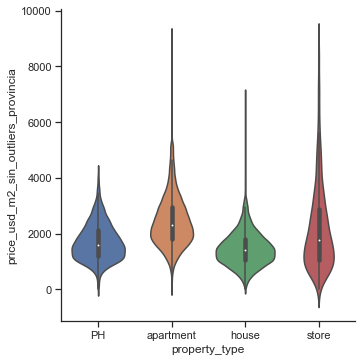

In [377]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = "property_type", y = "price_usd_m2_sin_outliers_provincia", data=data5, kind="violin")
    g.set_axis_labels("property_type", "price_usd_m2_sin_outliers_provincia");

<p style="color:#FF0000";> En este gráfico se nota cómo la NO agrupación por tipo de propiedad al momento de limpiar outliers hace que siga habiendo ruido en las variables

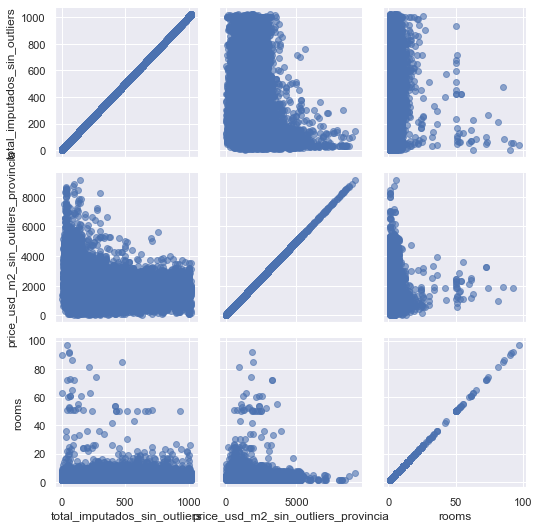

In [379]:
surface_price_graph = sns.PairGrid(data5, vars = ['total_imputados_sin_outliers', 'price_usd_m2_sin_outliers_provincia', 'rooms'], palette = 'pastel')
surface_price_graph.map(plt.scatter, alpha = 0.6 )

<AxesSubplot:xlabel='price_usd_m2_sin_outliers_provincia', ylabel='Count'>

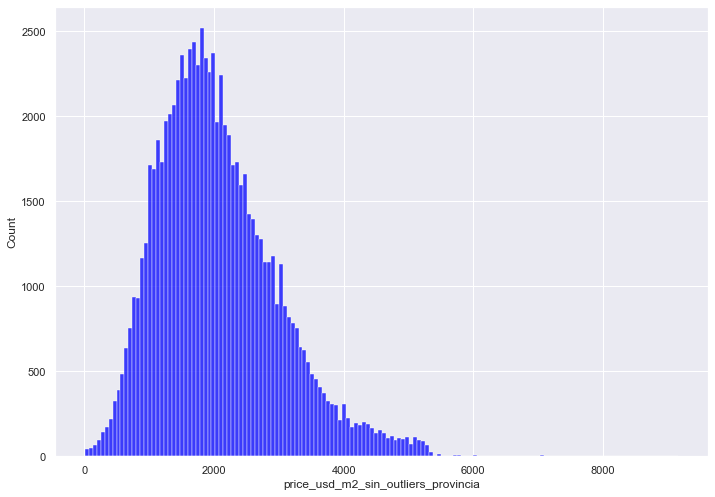

In [381]:
sns.histplot(data5['price_usd_m2_sin_outliers_provincia'], color = "blue", bins = 150)

<p style="color:#FF0000";> Estimados, creo atacaron todos los objetivos planteado por el desafio pero sería bueno pegarle una revisión al trabajo de cara a la confección del modelo en el Desafio 2. Hay 2 o 3 comentarios que les hice que pueden ser claves para hallanar el camino al momento de predecir la variable target.

<p style="color:#FF0000";> Creo que faltó un poco de trabajo análitico en la parte de visualización pero estoy seguro que fue por cuestiones de tiempo más que por cuestiones técnicas o falta de ideas,  lo que es super entendible!

<p style="color:#FF0000";> Me gustó que se animaran a usar Markdowns para comentar la notebook, ayuda mucho al lector (y a ustedes mismos) a saber qué se está haciendo. Creo que por momento hubo un exceso de comentario, tal vez con comentar ideas generales de lo que se va a hacer en los siguientes 3 o 4 bloques alcanza. No es necesario relatar todas las líneas lo que se está haciendo, sino más bien guiar al lector en términos más generales

<h3 style="color:#FF0000";>  Felicitaciones por la entrega del primer desafio, a seguir !

In [206]:
#¿Cómo mejorar un modelo lineal?
#Las perillas en un modelo lineal no son muchas ya que no tenemos hiperparametros, lo que se puede hacer es:
#1)	Incluir data al modelo
#2)	Pre procesar la data mejor, limpiarla mejor, eliminando outliers por ejemplo.
#3)	Generar nuevas variables.
#4)	Proponer interacciones entre variables

In [382]:
data5

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,metros_description,final_price_usd_m2,refaccionado,pileta,amenities,cochera,financiacion,rooms_sin_outliers,price_usd_m2_sin_outliers_localidad,price_usd_m2_sin_outliers_provincia
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.00,62000.0,55.0,...,NaN,1550.00,1,0,0,0,0,2.0,1550.00,1550.00
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.00,150000.0,NaN,...,NaN,NaN,0,0,0,1,0,1.0,NaN,NaN
2,apartment,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.00,72000.0,55.0,...,NaN,1309.09,0,0,0,0,0,2.0,1309.09,1309.09
3,PH,Liniers,Capital Federal|Liniers|,Capital Federal,"-34.6477969,-58.5164244",95000.0,USD,1676227.50,95000.0,NaN,...,NaN,NaN,0,0,0,0,0,3.0,NaN,NaN
4,apartment,Centro,Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.00,64000.0,35.0,...,NaN,1828.57,0,0,0,0,0,2.0,1828.57,1828.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121214,store,San Isidro,Bs.As. G.B.A. Zona Norte|San Isidro|,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,NaN,123.0,...,NaN,NaN,0,0,0,1,0,NaN,NaN,NaN
121215,apartment,Belgrano,Capital Federal|Belgrano|,Capital Federal,NaN,870000.0,USD,15350715.00,870000.0,113.0,...,NaN,9354.84,0,1,0,1,0,3.0,NaN,NaN
121216,house,Beccar,Bs.As. G.B.A. Zona Norte|San Isidro|Beccar|,Bs.As. G.B.A. Zona Norte,NaN,498000.0,USD,8786961.00,498000.0,360.0,...,572,1383.33,0,1,0,0,0,5.0,1383.33,1383.33
121217,apartment,Villa Urquiza,Capital Federal|Villa Urquiza|,Capital Federal,"-34.5706388726,-58.4755963355",131500.0,USD,2320251.75,131500.0,46.0,...,00,3371.79,0,0,1,1,0,1.0,3371.79,3371.79


In [383]:
data5.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat-lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'numero_ambientes_title',
       'numero_ambientes_desc_letras', 'numero_ambientes_description',
       'dormitorios_letras', 'dormitorios_numeros',
       'numero_ambientes_title_letras', 'rooms', 'description', 'title',
       'Provincia', 'Localidad', 'Info_extra', 'total_en_zeros',
       'covered_en_zeros', 'total_sin_outliers', 'covered_sin_outliers',
       'covered_imputados', 'total_imputados', 'total_imputados_sin_outliers',
       'covered_imputados_sin_outliers', 'metros_description',
       'final_price_usd_m2', 'refaccionado', 'pileta', 'amenities', 'cochera',
       'financiacion', 'rooms_sin_outliers',
       'price_usd_m2_sin_outliers_localidad',
       'price_usd_m2_sin_outliers_provincia'],
      dtype='obj

In [384]:
data5.isnull().sum()

property_type                               0
place_name                                 23
place_with_parent_names                     0
state_name                                  0
lat-lon                                 42657
price                                   14557
currency                                14557
price_aprox_local_currency              14557
price_aprox_usd                         14557
surface_total_in_m2                     35540
surface_covered_in_m2                   16662
price_usd_per_m2                        44367
price_per_m2                            26453
numero_ambientes_title                  87500
numero_ambientes_desc_letras            95596
numero_ambientes_description            73696
dormitorios_letras                      86543
dormitorios_numeros                     70438
numero_ambientes_title_letras          103097
rooms                                   11710
description                                 0
title                             

In [386]:
#Nos quedamos con aquellas features que vamos a utilizar en el modelo
data6 = data5.loc[:,["property_type","price_usd_m2_sin_outliers_provincia","covered_imputados","total_imputados","Provincia","Localidad", "refaccionado","pileta", "amenities", "rooms"]]

In [387]:
data6.rename(columns={"covered_imputados":"superficie_cubierta", "total_imputados":"superficie_total","price_usd_m2_sin_outliers_provincia":"price_usd_m2"}, inplace=True)

In [388]:
data6.head()

,property_type,price_usd_m2,superficie_cubierta,superficie_total,Provincia,Localidad,refaccionado,pileta,amenities,rooms
0,PH,1550.00,40.0,55.0,Capital Federal,Mataderos,1,0,0,2.0
1,apartment,NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,La Plata,0,0,0,1.0
2,apartment,1309.09,55.0,55.0,Capital Federal,Mataderos,0,0,0,2.0
3,PH,NaN,NaN,NaN,Capital Federal,Liniers,0,0,0,3.0
4,apartment,1828.57,35.0,35.0,Buenos Aires Costa Atlántica,Mar del Plata,0,0,0,2.0


In [389]:
data6.isnull().sum()

property_type              0
price_usd_m2           27013
superficie_cubierta    10692
superficie_total        7853
Provincia                  0
Localidad                  0
refaccionado               0
pileta                     0
amenities                  0
rooms                  11710
dtype: int64

In [390]:
data6.dtypes

property_type           object
price_usd_m2           float64
superficie_cubierta    float64
superficie_total       float64
Provincia               object
Localidad               object
refaccionado             int64
pileta                   int64
amenities                int64
rooms                  float64
dtype: object

In [391]:
data6["rooms"] = data6["rooms"].astype(float)

In [411]:
data6.isnull().sum()

property_type              0
price_usd_m2           27013
superficie_cubierta    10692
superficie_total        7853
Provincia                  0
Localidad                  0
refaccionado               0
pileta                     0
amenities                  0
rooms                  11710
dtype: int64

In [425]:
data7 = data6.dropna()
data7.shape

(73177, 10)

### Analizamos la correlacion de las variables

In [413]:
#realizmaos una matriz de correlaciones
features = ["refaccionado", "pileta", "amenities","superficie_cubierta","superficie_total","rooms","price_usd_m2"]
data7[features].corr()

,refaccionado,pileta,amenities,superficie_cubierta,superficie_total,rooms,price_usd_m2
refaccionado,1.000000,-0.026660,-0.038577,0.021632,0.007633,0.037518,-0.035739
pileta,-0.026660,1.000000,0.310553,0.125398,0.069703,0.077999,0.122693
amenities,-0.038577,0.310553,1.000000,-0.067754,-0.036667,-0.104197,0.312149
superficie_cubierta,0.021632,0.125398,-0.067754,1.000000,0.337559,0.172387,-0.158414
superficie_total,0.007633,0.069703,-0.036667,0.337559,1.000000,0.086001,-0.088384
rooms,0.037518,0.077999,-0.104197,0.172387,0.086001,1.000000,-0.183354
price_usd_m2,-0.035739,0.122693,0.312149,-0.158414,-0.088384,-0.183354,1.000000


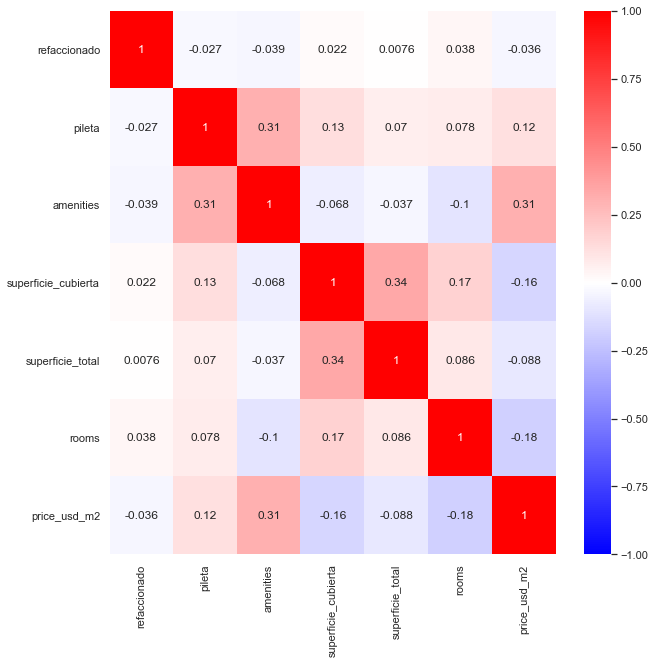

In [414]:
#Visualizamos la matriz de correlacion en Seaborn usando un heatmap
sns.heatmap(data7[features].corr(), vmin=-1, vmax=1, center=0, cmap="bwr", annot=True);

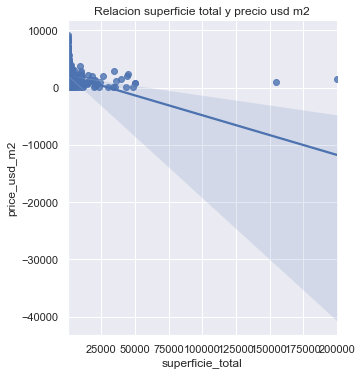

In [415]:
plt.rcParams['figure.figsize']=(10,10)
sns.lmplot(x="superficie_total", y="price_usd_m2", data=data7)
plt.title("Relacion superficie total y precio usd m2")
plt.show()


### Utilizamos el VIF para medir la multicolinealidad entre variables

In [416]:
#Analizamos el VIF (variance inflation factor)
#si el VIF > 10 puede llegar a hacer ruido la varible
#si el VIF > 30 se recomienda sacar la variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(data7[features].values,i) for i in range(data7[features].shape[1])]
vif = pd.DataFrame({"vif":vif}, index=features)
vif.sort_values(by="vif", ascending=False)

,vif
price_usd_m2,2.525241
rooms,2.418183
pileta,1.606522
superficie_cubierta,1.426892
amenities,1.336575
superficie_total,1.172234
refaccionado,1.020273


### Empezamos a armar el modelo 

In [417]:
data7.head()

,property_type,price_usd_m2,superficie_cubierta,superficie_total,Provincia,Localidad,refaccionado,pileta,amenities,rooms
0,PH,1550.00,40.0,55.0,Capital Federal,Mataderos,1,0,0,2.0
2,apartment,1309.09,55.0,55.0,Capital Federal,Mataderos,0,0,0,2.0
4,apartment,1828.57,35.0,35.0,Buenos Aires Costa Atlántica,Mar del Plata,0,0,0,2.0
7,apartment,3450.00,40.0,45.0,Capital Federal,Belgrano,0,1,0,1.0
8,apartment,3250.00,60.0,65.0,Capital Federal,Belgrano,0,1,0,2.0


In [431]:
#Nos quedamos con aquellas variables numericas
variables_numericas = ["superficie_cubierta","superficie_total","refaccionado", "pileta","amenities","rooms"]
numericas = data7[variables_numericas]

#Nos quedamos con aquellas variables categoricas 
variables_categoricas = ["property_type", "Provincia"]
dummies = pd.get_dummies(data7[variables_categoricas], drop_first=True) 
dummies

,property_type_apartment,property_type_house,property_type_store,Provincia_Bs.As. G.B.A. Zona Oeste,Provincia_Bs.As. G.B.A. Zona Sur,Provincia_Buenos Aires Costa Atlántica,Provincia_Buenos Aires Interior,Provincia_Capital Federal,Provincia_Catamarca,Provincia_Chaco,...,Provincia_Neuquén,Provincia_Río Negro,Provincia_Salta,Provincia_San Juan,Provincia_San Luis,Provincia_Santa Cruz,Provincia_Santa Fe,Provincia_Santiago Del Estero,Provincia_Tierra Del Fuego,Provincia_Tucumán
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121202,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121203,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121205,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121216,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [432]:
#Creamos la variable X de "features" y la variable Y "target" 
X = pd.concat([numericas, dummies], axis=1)
Y = data7["price_usd_m2"]

In [433]:
#separamos los datos de entrenamiento y testeo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 10)

In [434]:
#Creamos el modelo utilizando Stats Model
import statsmodels.api as sm

#instanciamos la constante tanto para entrenamiento como testeo.
X_train_sm = sm.add_constant(x_train)
X_test_sm = sm.add_constant(x_test)

#instanciamos el modelo SIN regularizacion
modelo_sin_regularizacion = sm.OLS(y_train, X_train_sm).fit()

#calculamos las predicciones sin regularizacion
prediccones_sin_regularizacion = modelo_sin_regularizacion.predict(X_test_sm)

In [435]:
#probamos ciertas metricas
from statsmodels.tools import eval_measures
from sklearn import metrics
print("RMSE :", eval_measures.rmse(y_test, prediccones_sin_regularizacion))
print("MAE :", eval_measures.meanabs(y_test, prediccones_sin_regularizacion))
print("R2 :", metrics.r2_score(y_test, prediccones_sin_regularizacion))

RMSE : 660.5201693898917
MAE : 501.7818834297888
R2 : 0.47360685570920136


In [436]:
modelo_sin_regularizacion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_usd_m2   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1402.
Date:                Fri, 25 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:48:48   Log-Likelihood:            -4.3452e+05
No. Observations:               54882   AIC:                         8.691e+05
Df Residuals:                   54845   BIC:                         8.694e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1802.0447     14.177    127.113      0.000    1774.258    1829.831
superficie_cubierta                       -0.1515      0.012    -12.646      0.000      -0.175      -0.128
superficie_total                          -0.0035      0.003     -1.067      0.286      -0.010       0.003
refaccionado                             -96.1575     21.201     -4.535      0.000    -137.712     -54.603
pileta                                   269.8391      7.187     37.546      0.000     255.753     283.925
amenities                                336.8116     10.749     31.333      0.000     315.743     357.880
rooms                                     -3.7138      1.491     -2.491      0.013      -6.636      -0.791
property_type_apartment                  594.9756     12.820     46.409      0.000     569.848     620.103
property_type_house                     -163.0677     13.536    -12.047      0.000    -189.599    -136.536
property_type_store                      317.2848     34.057      9.316      0.000     250.534     384.036
Provincia_Bs.As. G.B.A. Zona Oeste      -458.7045     12.008    -38.200      0.000    -482.240    -435.169
Provincia_Bs.As. G.B.A. Zona Sur        -417.8468     10.693    -39.077      0.000    -438.805    -396.889
Provincia_Buenos Aires Costa Atlántica  -409.3862     11.179    -36.620      0.000    -431.298    -387.474
Provincia_Buenos Aires Interior         -521.6381     22.086    -23.618      0.000    -564.927    -478.349
Provincia_Capital Federal                336.7207      8.351     40.321      0.000     320.353     353.089
Provincia_Catamarca                      696.1063    221.518      3.142      0.002     261.929    1130.283
Provincia_Chaco                         -790.0679    177.667     -4.447      0.000   -1138.297    -441.838
Provincia_Chubut                         768.1958     76.102     10.094      0.000     619.036     917.355
Provincia_Corrientes                    -383.4499     41.141     -9.320      0.000    -464.087    -302.813
Provincia_Córdoba                       -826.6662     12.050    -68.603      0.000    -850.284    -803.048
Provincia_Entre Ríos                    -575.1007     91.489     -6.286      0.000    -754.420    -395.782
Provincia_Formosa                       -861.5062    332.281     -2.593      0.010   -1512.780    -210.232
Provincia_Jujuy                         2090.3122    251.192      8.322      0.000    1597.974    2582.651
Provincia_La Pampa                      -871.6782    210.174     -4.147      0.000   -1283.620    -459.736
Provincia_La Rioja                     -1190.6607    469.834     -2.534      0.011   -2111.539    -269.782
Provincia_Mendoza                       -741.5459     44.300    -16.739      0.000    -

In [437]:
#Hacemos Cross Validation para sacar lambda
from sklearn import linear_model
lasso_cv = linear_model.LassoCV(normalize = True, cv = 5)
cross_validation = lasso_cv.fit(x_train, y_train)

In [438]:
best_alpha = cross_validation.alpha_
best_alpha

0.0019443279009862349

In [439]:
#regularizamos el modelo con una regresion Lasso
modelo_con_regularizacion = sm.OLS(y_train, X_train_sm)
modelo_regularizado = modelo_con_regularizacion.fit_regularized(alpha = best_alpha, L1_wt = 1)
modelo_regularizado

In [440]:
#predecimos con el nuevo modelo regularizado
prediccones_con_regularizacion = modelo_regularizado.predict(X_test_sm)

#probamos ciertas metricas 
print("RMSE: ", eval_measures.rmse(y_test,prediccones_con_regularizacion))
print("MAE: ", eval_measures.meanabs(y_test,prediccones_con_regularizacion))
print("R2: ", metrics.r2_score(y_test, prediccones_con_regularizacion))

RMSE:  660.6035522849613
MAE:  501.94544239592403
R2:  0.47347394544609156


In [441]:
modelo_regularizado.summary()

NotImplementedError: 